### train.csv - 학습용 데이터

- 단지코드
- 총세대수
- 임대건물구분
- 지역
- 공급유형
- 전용면적
- 전용면적별세대수
- 공가수
- 신분
- 임대료보증금
- 임대료
- 도보 10분거리 내 지하철역 수(환승노선 수 반영)
- 도보 10분거리 내 버스정류장 수
- 단지내주차면수
- 등록차량수
﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿

### test.csv - 테스트 데이터

- 단지코드
- 총세대수
- 임대건물구분
- 지역
- 공급유형
- 전용면적
- 전용면적별세대수
- 공가수
- 신분
- 임대료보증금
- 임대료
- 도보 10분거리 내 지하철역 수(환승노선 수 반영)
- 도보 10분거리 내 버스정류장 수
- 단지내주차면수


### age_gender_info.csv - 지역 임대주택 나이별, 성별 인구 분포

지역
10대미만(여자)
10대미만(남자)
20대(여자)
20대(남자)
30대(여자)
30대(남자)
40대(여자)
40대(남자)
50대(여자)
50대(남자)
60대(여자)
60대(남자)
70대(여자)
70대(남자)
80대(여자)
80대(남자)
90대(여자)
90대(남자)
100대(여자)
100대(남자)


### sample_submission.csv - 제출 양식

- code : 단지 코드
- num : 등록차량수


## 패키지

In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler



# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
# 지표를 하나만 설정할 경우
from sklearn.model_selection import cross_val_score
# 지표를 하나 이상 설정할 경우
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 모델의 최적의 하이퍼파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 차원축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 군집화
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

# 시간 측정을 위한 시간 모듈
import datetime
# 주식 정보를 읽어오기 위한 라이브러리
from pandas_datareader import data

# 데이터 수집
import requests
from bs4 import BeautifulSoup
import re
import time
import os
import json




# 저장
import pickle

from tqdm import tqdm

## 데이터

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
submission = pd.read_csv('data/sample_submission.csv')
agegender_info= pd.read_csv('data/age_gender_info.csv')
# train = train.drop('Unnamed: 0', axis=1)

In [3]:
display(train)
display(test)

단지코드  총세대수 임대건물구분    지역  공급유형   전용면적  전용면적별세대수   공가수 자격유형     임대보증금  \
0     C2483   900    아파트  경상북도  국민임대  39.72       134  38.0    A  15667000   
1     C2483   900    아파트  경상북도  국민임대  39.72        15  38.0    A  15667000   
2     C2483   900    아파트  경상북도  국민임대  51.93       385  38.0    A  27304000   
3     C2483   900    아파트  경상북도  국민임대  51.93        15  38.0    A  27304000   
4     C2483   900    아파트  경상북도  국민임대  51.93        41  38.0    A  27304000   
...     ...   ...    ...   ...   ...    ...       ...   ...  ...       ...   
2947  C2532   239    아파트   강원도  국민임대  49.20        19   7.0    A  11346000   
2948  C2532   239    아파트   강원도  국민임대  51.08        34   7.0    A  14005000   
2949  C2532   239    아파트   강원도  국민임대  51.73        34   7.0    A  14005000   
2950  C2532   239    아파트   강원도  국민임대  51.96       114   7.0    A  14005000   
2951  C2532   239    아파트   강원도  국민임대  54.95        19   7.0    A  14830000   

         임대료  도보 10분거리 내 지하철역 수(환승노선 수 반영)  도보 10분거리 내 버스정류장 수  단지내주차면수  \
0     103680                           0.0                 3.0   1425.0   
1     103680                           0.0                 3.0   1425.0   
2     184330                           0.0                 3.0   1425.0   
3     184330                           0.0                 3.0   1425.0   
4     184330                           0.0                 3.0   1425.0   
...      ...                           ...                 ...      ...   
2947  116090                           0.0                 1.0    166.0   
2948  142310                           0.0                 1.0    166.0   
2949  142310                           0.0                 1.0    166.0   
2950  142310                           0.0                 1.0    166.0   
2951  151030                           0.0                 1.0    166.0   

       등록차량수  
0     1015.0  
1     1015.0  
2     1015.0  
3     1015.0  
4     1015.0  
...      ...  
2947   146.0  
2948   146.0  
2949   146.0  
2950   146.0  
2951   146.0  

[2952 rows x 15 columns]

단지코드  총세대수 임대건물구분    지역  공급유형   전용면적  전용면적별세대수   공가수 자격유형     임대보증금  \
0     C1072   754    아파트   경기도  국민임대  39.79       116  14.0    H  22830000   
1     C1072   754    아파트   경기도  국민임대  46.81        30  14.0    A  36048000   
2     C1072   754    아파트   경기도  국민임대  46.90       112  14.0    H  36048000   
3     C1072   754    아파트   경기도  국민임대  46.90       120  14.0    H  36048000   
4     C1072   754    아파트   경기도  국민임대  51.46        60  14.0    H  43497000   
...     ...   ...    ...   ...   ...    ...       ...   ...  ...       ...   
1017  C1267   675    아파트  경상남도  행복주택  36.77       126  38.0    L         -   
1018  C2189   382    아파트  전라북도  국민임대  29.19        96  45.0    H   6872000   
1019  C2189   382    아파트  전라북도  국민임대  29.19        20  45.0    H   6872000   
1020  C2189   382    아파트  전라북도  국민임대  39.45       202  45.0    H  13410000   
1021  C2189   382    아파트  전라북도  국민임대  46.23        60  45.0    H  18689000   

         임대료  도보 10분거리 내 지하철역 수(환승노선 수 반영)  도보 10분거리 내 버스정류장 수  단지내주차면수  
0     189840                           0.0                 2.0    683.0  
1     249930                           0.0                 2.0    683.0  
2     249930                           0.0                 2.0    683.0  
3     249930                           0.0                 2.0    683.0  
4     296780                           0.0                 2.0    683.0  
...      ...                           ...                 ...      ...  
1017       -                           0.0                 1.0    467.0  
1018  106400                           0.0                 2.0    300.0  
1019  106400                           0.0                 2.0    300.0  
1020  144600                           0.0                 2.0    300.0  
1021  166500                           0.0                 2.0    300.0  

[1022 rows x 14 columns]

In [4]:
agegender_info

지역  10대미만(여자)  10대미만(남자)   10대(여자)   10대(남자)   20대(여자)   20대(남자)  \
0      경상북도   0.030158   0.033195  0.056346  0.061360  0.060096  0.067859   
1      경상남도   0.027400   0.026902  0.053257  0.055568  0.064920  0.070618   
2     대전광역시   0.028197   0.029092  0.040490  0.042793  0.060834  0.064247   
3       경기도   0.038030   0.039507  0.052546  0.053990  0.058484  0.059894   
4      전라북도   0.028089   0.029065  0.059685  0.060080  0.066262  0.070322   
5       강원도   0.028888   0.030682  0.051287  0.052712  0.060374  0.063157   
6     광주광역시   0.031994   0.034566  0.049851  0.050254  0.065084  0.066875   
7      충청남도   0.031369   0.031711  0.059077  0.062422  0.067975  0.072622   
8     부산광역시   0.022003   0.022947  0.032681  0.035512  0.053796  0.057233   
9   제주특별자치도   0.034690   0.036695  0.060094  0.063080  0.069135  0.069667   
10    울산광역시   0.023991   0.025997  0.053874  0.056967  0.064240  0.074689   
11     충청북도   0.034678   0.035339  0.059808  0.061570  0.060824  0.064937   
12     전라남도   0.031930   0.034647  0.059154  0.063379  0.065517  0.070339   
13    대구광역시   0.023765   0.025626  0.034098  0.037897  0.062559  0.068251   
14    서울특별시   0.015323   0.015627  0.025210  0.026121  0.052712  0.056782   
15  세종특별자치시   0.037159   0.036601  0.053172  0.050047  0.079284  0.064833   

     30대(여자)   30대(남자)   40대(여자)  ...   60대(여자)   60대(남자)   70대(여자)   70대(남자)  \
0   0.053433  0.049572  0.083660  ...  0.082684  0.063889  0.047717  0.030172   
1   0.056414  0.057550  0.077092  ...  0.087201  0.069562  0.048357  0.033277   
2   0.068654  0.066848  0.074667  ...  0.088468  0.070261  0.051010  0.037143   
3   0.072331  0.068704  0.083208  ...  0.074237  0.058419  0.042422  0.032725   
4   0.052027  0.046596  0.077005  ...  0.076636  0.068042  0.051025  0.035748   
5   0.059821  0.054321  0.076201  ...  0.088423  0.070014  0.047732  0.032760   
6   0.066888  0.064416  0.080028  ...  0.075930  0.059586  0.048552  0.031754   
7   0.065095  0.067303  0.078860  ...  0.070278  0.057692  0.042296  0.028682   
8   0.047049  0.048866  0.061952  ...  0.109297  0.085294  0.078743  0.053388   
9   0.050808  0.048026  0.080548  ...  0.074248  0.055717  0.047944  0.033054   
10  0.052830  0.052412  0.078450  ...  0.096422  0.069088  0.052913  0.039413   
11  0.061069  0.056625  0.082318  ...  0.075390  0.062427  0.041814  0.027566   
12  0.057977  0.053471  0.078358  ...  0.071465  0.062352  0.042535  0.030704   
13  0.061825  0.071207  0.070090  ...  0.094511  0.073133  0.055914  0.036572   
14  0.047655  0.051877  0.054216  ...  0.119639  0.078939  0.097543  0.061050   
15  0.106121  0.104447  0.075155  ...  0.065279  0.051163  0.026056  0.026223   

     80대(여자)   80대(남자)   90대(여자)   90대(남자)  100대(여자)  100대(남자)  
0   0.029361  0.011211  0.005578  0.001553  0.000234  0.000014  
1   0.027361  0.011295  0.004910  0.001086  0.000179  0.000010  
2   0.032455  0.013751  0.006494  0.001740  0.000298  0.000066  
3   0.025136  0.012354  0.005390  0.001707  0.000290  0.000067  
4   0.035049  0.012641  0.007223  0.001898  0.000158  0.000013  
5   0.033515  0.013027  0.007628  0.001677  0.000319  0.000017  
6   0.029749  0.010341  0.006343  0.000895  0.000353  0.000013  
7   0.024514  0.010900  0.005429  0.001549  0.000219  0.000123  
8   0.047908  0.020228  0.008043  0.002240  0.000268  0.000028  
9   0.026836  0.011332  0.006832  0.000982  0.000368  0.000082  
10  0.026540  0.011912  0.004221  0.001087  0.000084  0.000000  
11  0.027762  0.011212  0.005386  0.001310  0.000257  0.000037  
12  0.027340  0.009312  0.005965  0.001458  0.000149  0.000464  
13  0.031887  0.012556  0.005364  0.001259  0.000219  0.000000  
14  0.047853  0.023463  0.011344  0.003326  0.000532  0.000152  
15  0.013893  0.007086  0.003459  0.001004  0.000279  0.000112  

[16 rows x 23 columns]

- age_gender_info.csv의 분포는 train, test 데이터에만 해당하는 인구 분포입니다.
- age_gender_info.csv는 해당 단지들에 살고있는 모든 인구의 분포입니다.

In [5]:
train.shape, test.shape

((2952, 15), (1022, 14))

In [6]:
train.head()

단지코드  총세대수 임대건물구분    지역  공급유형   전용면적  전용면적별세대수   공가수 자격유형     임대보증금  \
0  C2483   900    아파트  경상북도  국민임대  39.72       134  38.0    A  15667000   
1  C2483   900    아파트  경상북도  국민임대  39.72        15  38.0    A  15667000   
2  C2483   900    아파트  경상북도  국민임대  51.93       385  38.0    A  27304000   
3  C2483   900    아파트  경상북도  국민임대  51.93        15  38.0    A  27304000   
4  C2483   900    아파트  경상북도  국민임대  51.93        41  38.0    A  27304000   

      임대료  도보 10분거리 내 지하철역 수(환승노선 수 반영)  도보 10분거리 내 버스정류장 수  단지내주차면수   등록차량수  
0  103680                           0.0                 3.0   1425.0  1015.0  
1  103680                           0.0                 3.0   1425.0  1015.0  
2  184330                           0.0                 3.0   1425.0  1015.0  
3  184330                           0.0                 3.0   1425.0  1015.0  
4  184330                           0.0                 3.0   1425.0  1015.0

- 공가수 : 비어있는 집

In [7]:
test.head()

단지코드  총세대수 임대건물구분   지역  공급유형   전용면적  전용면적별세대수   공가수 자격유형     임대보증금  \
0  C1072   754    아파트  경기도  국민임대  39.79       116  14.0    H  22830000   
1  C1072   754    아파트  경기도  국민임대  46.81        30  14.0    A  36048000   
2  C1072   754    아파트  경기도  국민임대  46.90       112  14.0    H  36048000   
3  C1072   754    아파트  경기도  국민임대  46.90       120  14.0    H  36048000   
4  C1072   754    아파트  경기도  국민임대  51.46        60  14.0    H  43497000   

      임대료  도보 10분거리 내 지하철역 수(환승노선 수 반영)  도보 10분거리 내 버스정류장 수  단지내주차면수  
0  189840                           0.0                 2.0    683.0  
1  249930                           0.0                 2.0    683.0  
2  249930                           0.0                 2.0    683.0  
3  249930                           0.0                 2.0    683.0  
4  296780                           0.0                 2.0    683.0

## 결측치 확인

In [8]:
train.isna().sum()

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              0
임대보증금                           569
임대료                             569
도보 10분거리 내 지하철역 수(환승노선 수 반영)    211
도보 10분거리 내 버스정류장 수                4
단지내주차면수                           0
등록차량수                             0
dtype: int64

In [9]:
test.isna().sum()

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              2
임대보증금                           180
임대료                             180
도보 10분거리 내 지하철역 수(환승노선 수 반영)     42
도보 10분거리 내 버스정류장 수                0
단지내주차면수                           0
dtype: int64

In [10]:
agegender_info.isna().sum()

지역           0
10대미만(여자)    0
10대미만(남자)    0
10대(여자)      0
10대(남자)      0
20대(여자)      0
20대(남자)      0
30대(여자)      0
30대(남자)      0
40대(여자)      0
40대(남자)      0
50대(여자)      0
50대(남자)      0
60대(여자)      0
60대(남자)      0
70대(여자)      0
70대(남자)      0
80대(여자)      0
80대(남자)      0
90대(여자)      0
90대(남자)      0
100대(여자)     0
100대(남자)     0
dtype: int64

### 중복제거

In [11]:
train.shape, train.drop_duplicates().shape # 중복 존재

((2952, 15), (2632, 15))

In [12]:
test.shape, test.drop_duplicates().shape # 중복 존재

((1022, 14), (949, 14))

In [13]:
train[train.duplicated(keep=False)]

단지코드  총세대수 임대건물구분     지역  공급유형   전용면적  전용면적별세대수   공가수 자격유형     임대보증금  \
20    C1407  1216    아파트  대전광역시  국민임대  41.58        70  13.0    A  27637000   
21    C1407  1216    아파트  대전광역시  국민임대  41.58        70  13.0    A  27637000   
22    C1407  1216    아파트  대전광역시  국민임대  46.36       170  13.0    A  36048000   
23    C1407  1216    아파트  대전광역시  국민임대  46.36       170  13.0    A  36048000   
24    C1407  1216    아파트  대전광역시  국민임대  51.24        62  13.0    A  42056000   
...     ...   ...    ...    ...   ...    ...       ...   ...  ...       ...   
2749  C1803   100    아파트  울산광역시  행복주택  36.16         9  13.0    J  46400000   
2795  C2362  1509    아파트    경기도  행복주택  21.96       144  46.0    J  19760000   
2796  C2362  1509    아파트    경기도  행복주택  21.96       144  46.0    J  19760000   
2800  C2362  1509    아파트    경기도  행복주택  26.85        48  46.0    J  23520000   
2801  C2362  1509    아파트    경기도  행복주택  26.85        48  46.0    J  23520000   

         임대료  도보 10분거리 내 지하철역 수(환승노선 수 반영)  도보 10분거리 내 버스정류장 수  단지내주차면수  \
20    164610                           1.0                 1.0   1285.0   
21    164610                           1.0                 1.0   1285.0   
22    198250                           1.0                 1.0   1285.0   
23    198250                           1.0                 1.0   1285.0   
24    253520                           1.0                 1.0   1285.0   
...      ...                           ...                 ...      ...   
2749  220780                           0.0                 2.0     57.0   
2795   83000                           0.0                 2.0   1055.0   
2796   83000                           0.0                 2.0   1055.0   
2800   99000                           0.0                 2.0   1055.0   
2801   99000                           0.0                 2.0   1055.0   

       등록차량수  
20    1064.0  
21    1064.0  
22    1064.0  
23    1064.0  
24    1064.0  
...      ...  
2749    78.0  
2795   196.0  
2796   196.0  
2800   196.0  
2801   196.0  

[456 rows x 15 columns]

In [14]:
test[test.duplicated(keep=False)]

단지코드  총세대수 임대건물구분     지역  공급유형   전용면적  전용면적별세대수   공가수 자격유형     임대보증금  \
22   C1456   619    아파트  부산광역시  국민임대  46.90        86  18.0    A  36048000   
23   C1456   619    아파트  부산광역시  국민임대  46.90        86  18.0    A  36048000   
76   C1006  1505    아파트  대전광역시  영구임대  26.37        10  27.0    D       NaN   
77   C1006  1505    아파트  대전광역시  영구임대  26.37        10  27.0    D       NaN   
80   C1006  1505     상가  대전광역시  임대상가  38.00         1  27.0    D       NaN   
..     ...   ...    ...    ...   ...    ...       ...   ...  ...       ...   
893  C1327    98    아파트  대전광역시  행복주택  26.51        10  13.0    J  28400000   
962  C2404   214    아파트   전라남도  행복주택  16.95        12  15.0    J  12480000   
963  C2404   214    아파트   전라남도  행복주택  16.95        12  15.0    J  12480000   
978  C2404   214    아파트   전라남도  행복주택  36.88         5  15.0    J  25600000   
979  C2404   214    아파트   전라남도  행복주택  36.88         5  15.0    J  25600000   

        임대료  도보 10분거리 내 지하철역 수(환승노선 수 반영)  도보 10분거리 내 버스정류장 수  단지내주차면수  
22   234300                           0.0                16.0    547.0  
23   234300                           0.0                16.0    547.0  
76      NaN                           2.0                 5.0    428.0  
77      NaN                           2.0                 5.0    428.0  
80      NaN                           2.0                 5.0    428.0  
..      ...                           ...                 ...      ...  
893  142000                           NaN                17.0     98.0  
962   78000                           0.0                 5.0    117.0  
963   78000                           0.0                 5.0    117.0  
978  160000                           0.0                 5.0    117.0  
979  160000                           0.0                 5.0    117.0  

[116 rows x 14 columns]

In [15]:
## 빠진 자격 유형 
test.loc[(test.자격유형.isnull()) & (test.단지코드 == "C2411"), '자격유형'] = 'A'
test.loc[(test.자격유형.isnull()) & (test.단지코드 == "C2253"), '자격유형'] = 'C'

## apps 전처리를 위한 train, test 결합

In [16]:
# pandas의 concat()을 이용하여 app_train과 app_test를 결합
apps = pd.concat([train,test])
apps.shape

(3974, 15)

## 결측치 확인

In [17]:
apps.isna().sum()

단지코드                               0
총세대수                               0
임대건물구분                             0
지역                                 0
공급유형                               0
전용면적                               0
전용면적별세대수                           0
공가수                                0
자격유형                               0
임대보증금                            749
임대료                              749
도보 10분거리 내 지하철역 수(환승노선 수 반영)     253
도보 10분거리 내 버스정류장 수                 4
단지내주차면수                            0
등록차량수                           1022
dtype: int64

In [18]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3974 entries, 0 to 1021
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          3974 non-null   object 
 1   총세대수                          3974 non-null   int64  
 2   임대건물구분                        3974 non-null   object 
 3   지역                            3974 non-null   object 
 4   공급유형                          3974 non-null   object 
 5   전용면적                          3974 non-null   float64
 6   전용면적별세대수                      3974 non-null   int64  
 7   공가수                           3974 non-null   float64
 8   자격유형                          3974 non-null   object 
 9   임대보증금                         3225 non-null   object 
 10  임대료                           3225 non-null   object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  3721 non-null   float64
 12  도보 10분거리 내 버스정류장 수            3970 non-null   float64
 13  단지내

In [19]:
apps['지역'].value_counts()

경기도        880
경상남도       454
부산광역시      416
대전광역시      322
강원도        293
충청북도       214
충청남도       199
전라남도       188
광주광역시      187
경상북도       177
전라북도       150
대구광역시      138
제주특별자치도    117
울산광역시      109
세종특별자치시     66
서울특별시       64
Name: 지역, dtype: int64

In [20]:
apps['임대건물구분'].value_counts()

아파트    3235
상가      739
Name: 임대건물구분, dtype: int64

In [21]:
apps['공급유형'].value_counts()

국민임대         2380
임대상가          739
행복주택          337
공공임대(10년)     240
영구임대          197
공공임대(50년)      44
공공임대(분납)       18
장기전세            9
공공분양            7
공공임대(5년)        3
Name: 공급유형, dtype: int64

In [22]:
apps['단지내주차면수'].value_counts()

166.0    71
270.0    60
756.0    47
418.0    46
131.0    46
         ..
380.0     2
682.0     2
136.0     1
420.0     1
30.0      1
Name: 단지내주차면수, Length: 453, dtype: int64

In [23]:
apps['도보 10분거리 내 버스정류장 수'].value_counts()

2.0     1032
3.0      942
4.0      627
1.0      387
5.0      276
6.0      241
8.0      132
7.0      113
10.0      84
12.0      27
15.0      21
16.0      19
20.0      15
11.0      14
50.0       9
14.0       8
19.0       7
18.0       7
17.0       4
13.0       3
0.0        2
Name: 도보 10분거리 내 버스정류장 수, dtype: int64

In [24]:
apps['자격유형'].value_counts()

A    2374
D     749
H     247
J     198
C     130
I      56
K      49
E      47
L      45
N      40
B      21
G      10
M       4
F       3
O       1
Name: 자격유형, dtype: int64

## 컬럼명 변경

지하쳘역 수와 버스 정류장 수의 컬럼명을 지하철, 버스로 변경하였습니다.

In [25]:
apps.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', '단지내주차면수', '등록차량수'],
      dtype='object')

In [26]:
apps.columns = [
    '단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수', '신분',
    '임대보증금', '임대료', '지하철', '버스',
    '단지내주차면수', '등록차량수'
]

In [27]:
apps['단지코드'].describe()

count      3974
unique      573
top       C1439
freq         48
Name: 단지코드, dtype: object

### 임대료의 '-'값 Nan값으로 처리

In [28]:
apps['임대료'].value_counts()

-         27
79980     23
187260    22
167230    22
149810    22
          ..
331610     1
205880     1
165340     1
318070     1
126460     1
Name: 임대료, Length: 1278, dtype: int64

In [29]:
apps['임대료'] = apps['임대료'].replace('-', np.NaN)

In [30]:
# 위와 동일한 결과를 볼 수 있다.
#train['임대료'].replace('-', 'nan',inplace = True )

In [31]:
apps['임대료'].value_counts()

79980     23
149810    22
187260    22
167230    22
111470    20
          ..
94000      1
187150     1
101080     1
102800     1
147000     1
Name: 임대료, Length: 1277, dtype: int64

In [32]:
apps['임대보증금'].value_counts()

19819000    25
18726000    23
14418000    23
5787000     23
24775000    22
            ..
15198000     1
35897000     1
18269000     1
17568000     1
9719000      1
Name: 임대보증금, Length: 1237, dtype: int64

In [33]:
print(apps[apps['임대보증금'] == '-']['임대보증금'].count())

18


In [34]:
apps['임대보증금'].isnull().sum()

749

In [35]:
apps['임대보증금'] = apps['임대보증금'].replace('-', np.NaN)

In [36]:
apps['임대보증금'].isnull().sum()

767

#### object 타입을 float 로 바꿔준다.

In [37]:
apps['임대료']=apps['임대료'].astype('float')

In [38]:
apps['임대보증금']=apps['임대보증금'].astype('float')

## 전용면적을 5의 배수로 변경

In [39]:
apps['전용면적'].describe()

count    3974.000000
mean       44.486953
std        32.952546
min         9.960000
25%        32.127500
50%        39.840000
75%        51.282500
max       583.400000
Name: 전용면적, dtype: float64

In [40]:
# apps['전용면적'].unique()

In [41]:
apps['전용면적'] = apps['전용면적']//5*5

## 전용면적 상/하한 적용

상한100, 하한 15

In [42]:
# apps['전용면적']

<AxesSubplot:>

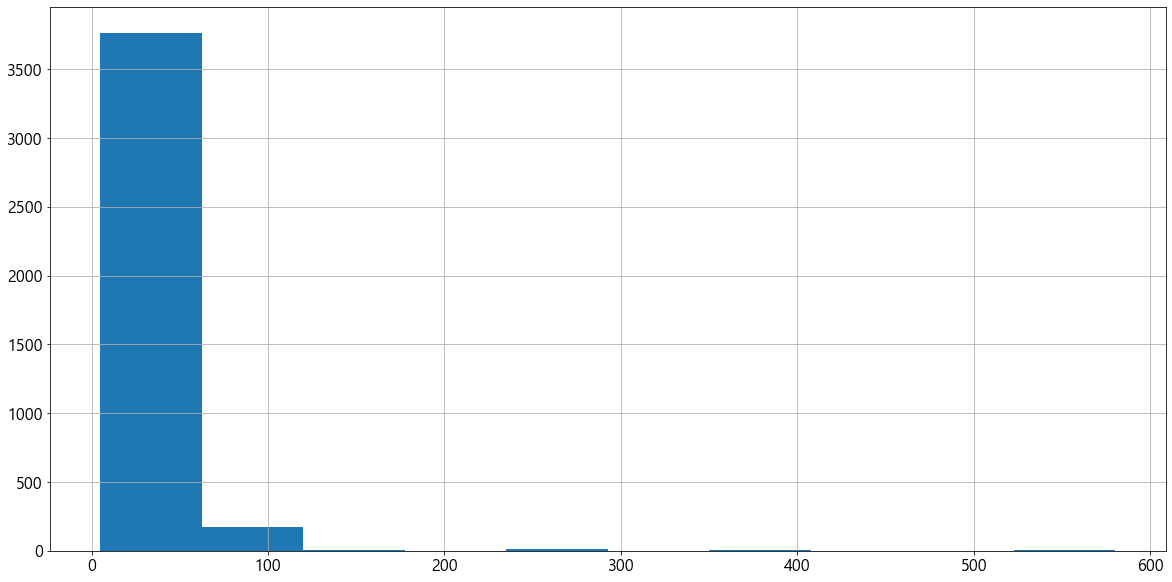

In [43]:
apps['전용면적'].hist()

<AxesSubplot:xlabel='전용면적'>

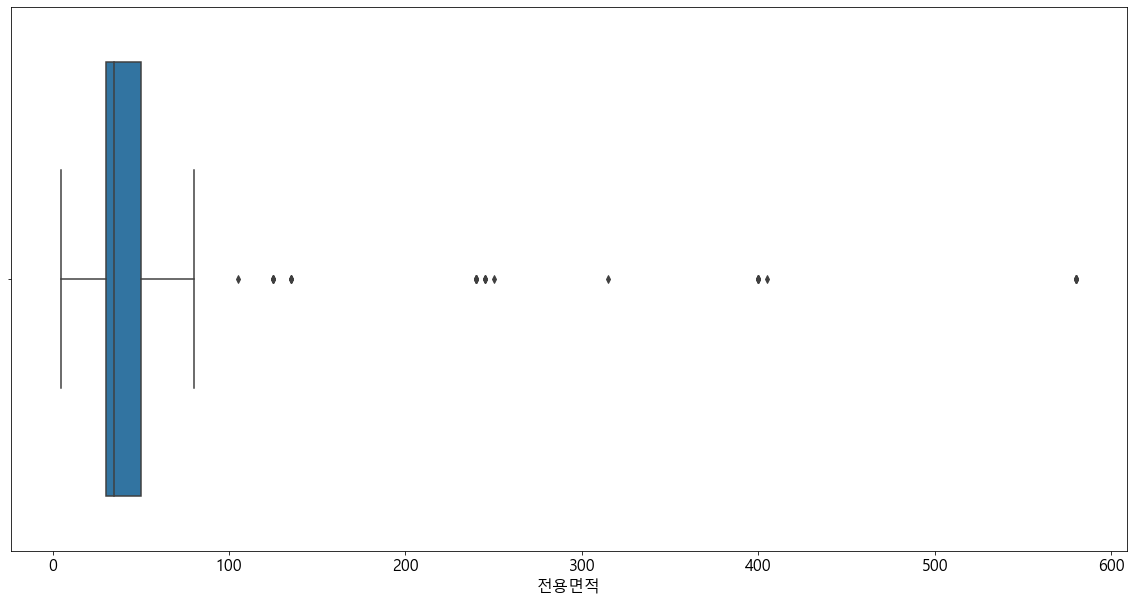

In [44]:
sns.boxplot(apps['전용면적'])

In [45]:
apps['전용면적'].describe()

count    3974.000000
mean       41.894816
std        32.809091
min         5.000000
25%        30.000000
50%        35.000000
75%        50.000000
max       580.000000
Name: 전용면적, dtype: float64

- max        580
- min         5

In [46]:
a=apps.loc[apps['전용면적'] >= 100]
a['전용면적'].count()

37

In [47]:
a=apps.loc[apps['전용면적'] >= 200]
a['전용면적'].count()

27

In [48]:
a=apps.loc[apps['전용면적'] >= 400]
a['전용면적'].count()

14

In [49]:
a=apps.loc[apps['전용면적'] <= 15]
a['전용면적'].count()

133

In [50]:
a=apps.loc[apps['전용면적'] <= 10]
a['전용면적'].count()

17

In [51]:
apps.drop(apps.loc[apps['전용면적']>= 100].index, inplace=True)

<AxesSubplot:xlabel='전용면적'>

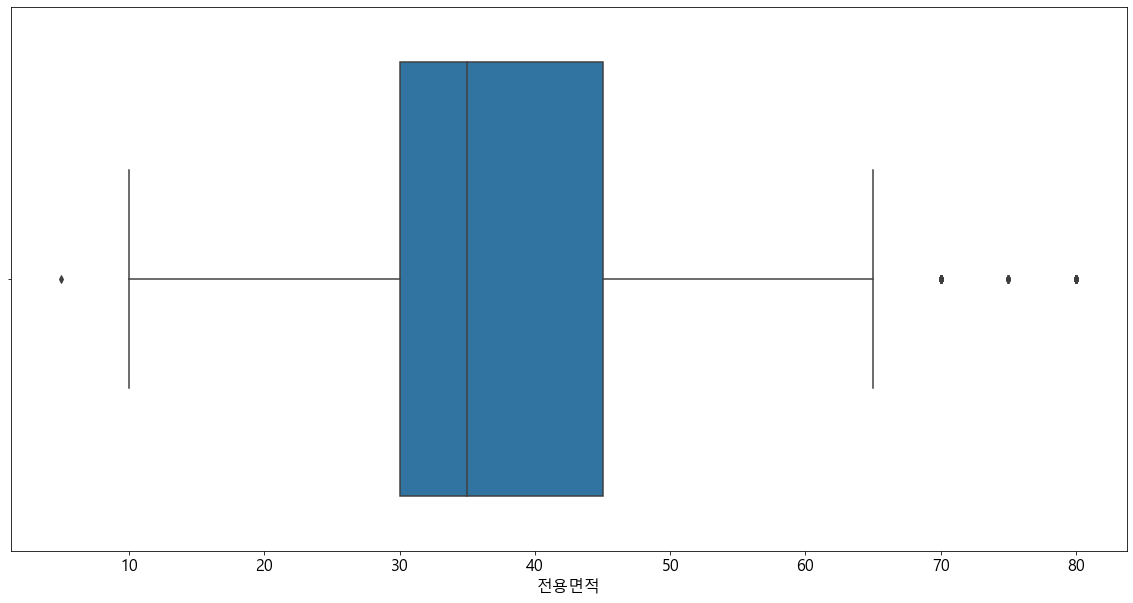

In [52]:
sns.boxplot(apps['전용면적'])

In [53]:
idx = apps[apps['전용면적']< 10].index
apps.loc[idx, '전용면적'] = 10

<AxesSubplot:xlabel='전용면적'>

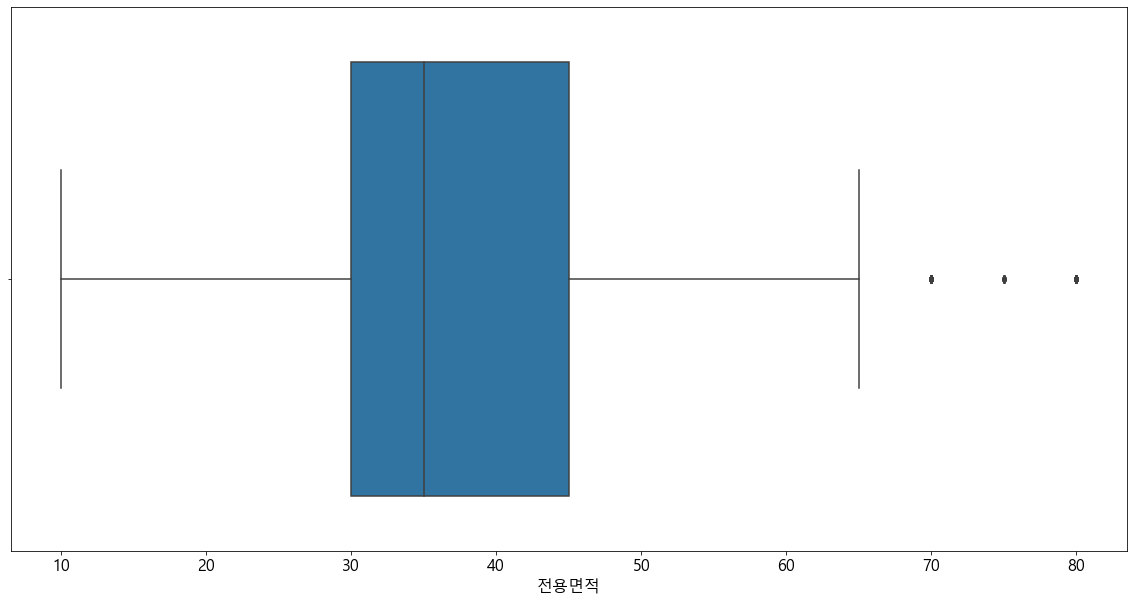

In [54]:
sns.boxplot(apps['전용면적'])

In [55]:
a=apps.loc[apps['전용면적'] >= 100]
a['전용면적'].count()

0

In [56]:
# idx = apps[apps['전용면적']>100].index
# apps.loc[idx, '전용면적'] = 100

In [57]:
# #a=train.iloc[train['전용면적'] >= 100 and train['전용면적'] <= 200]
# #a['단지내주차면수'].count()
# # ww = train['전용면적'].copy()

# def bin_01(data):
#     if data >= 100 and data <=200:
#         return 100
#     return data

# apps['전용면적'] = apps['전용면적'].apply(bin_01)

<AxesSubplot:xlabel='전용면적'>

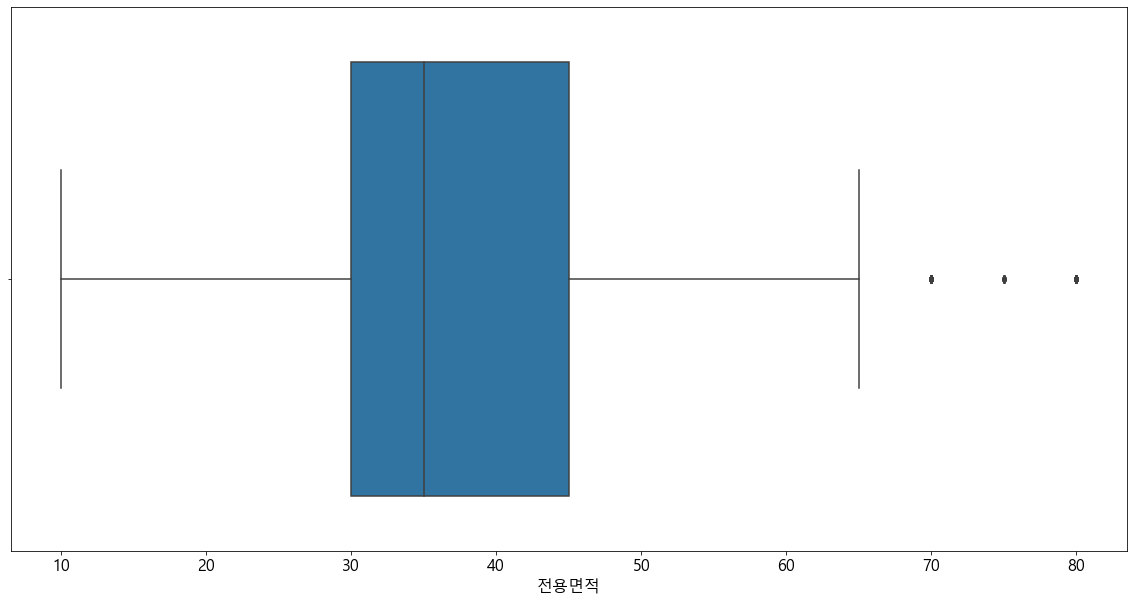

In [58]:
sns.boxplot(apps['전용면적'])

In [59]:
# def bin_02(data):
#     if data >= 200 and data <400:
#         return 300
#     return data

# apps['전용면적'] = apps['전용면적'].apply(bin_02)

In [60]:
# sns.boxplot(apps['전용면적'])

In [61]:
# def bin_03(data):
#     if data > 300:
#         return 400
#     return data

# apps['전용면적'] = apps['전용면적'].apply(bin_03)

In [62]:
# sns.boxplot(apps['전용면적'])

In [63]:
apps['전용면적'].describe()

count    3900.000000
mean       39.389744
std        13.278804
min        10.000000
25%        30.000000
50%        35.000000
75%        45.000000
max        80.000000
Name: 전용면적, dtype: float64

In [64]:
apps['전용면적'].unique()

array([35., 50., 55., 30., 45., 40., 25., 70., 10., 15., 20., 60., 75.,
       80., 65.])

In [65]:
# idx = apps[apps['전용면적']>100].index
# apps.loc[idx, '전용면적'] = 100

In [66]:
# idx = apps[apps['전용면적']<5].index
# apps.loc[idx, '전용면적'] = 5

In [67]:
# sns.boxplot(apps['전용면적'])

#### 단지내주차면수 (전처리 필요할지..?)

In [68]:
apps['단지내주차면수'].describe()

count    3900.000000
mean      591.759231
std       384.472637
min        13.000000
25%       286.000000
50%       507.000000
75%       805.000000
max      1798.000000
Name: 단지내주차면수, dtype: float64

<AxesSubplot:xlabel='단지내주차면수'>

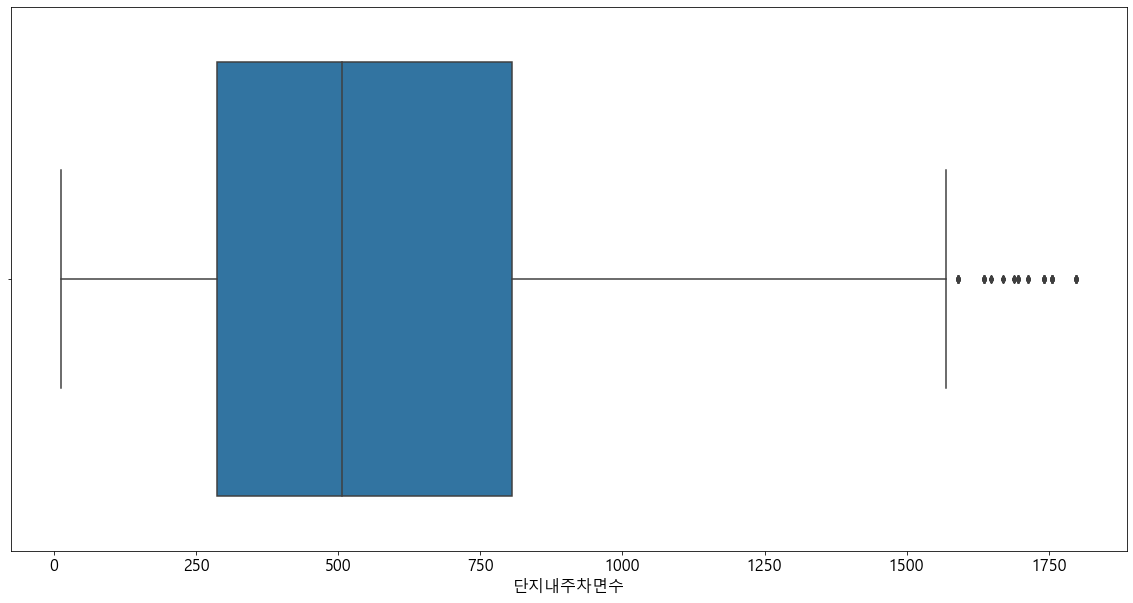

In [69]:
sns.boxplot(apps['단지내주차면수'])

1700이상 값들이 이상치로 보여서 

In [70]:
a=apps.loc[apps['단지내주차면수'] >= 1700]

In [71]:
a['단지내주차면수'].value_counts()

1756.0    16
1798.0    14
1741.0    14
1713.0     9
Name: 단지내주차면수, dtype: int64

In [72]:
a['단지내주차면수'].mean()

1755.8301886792453

#### 이상치들의 평균값으로 대체

In [73]:
idx = apps[apps['단지내주차면수'] >= 1700].index
apps.loc[idx, '단지내주차면수'] = 1755

<AxesSubplot:xlabel='단지내주차면수'>

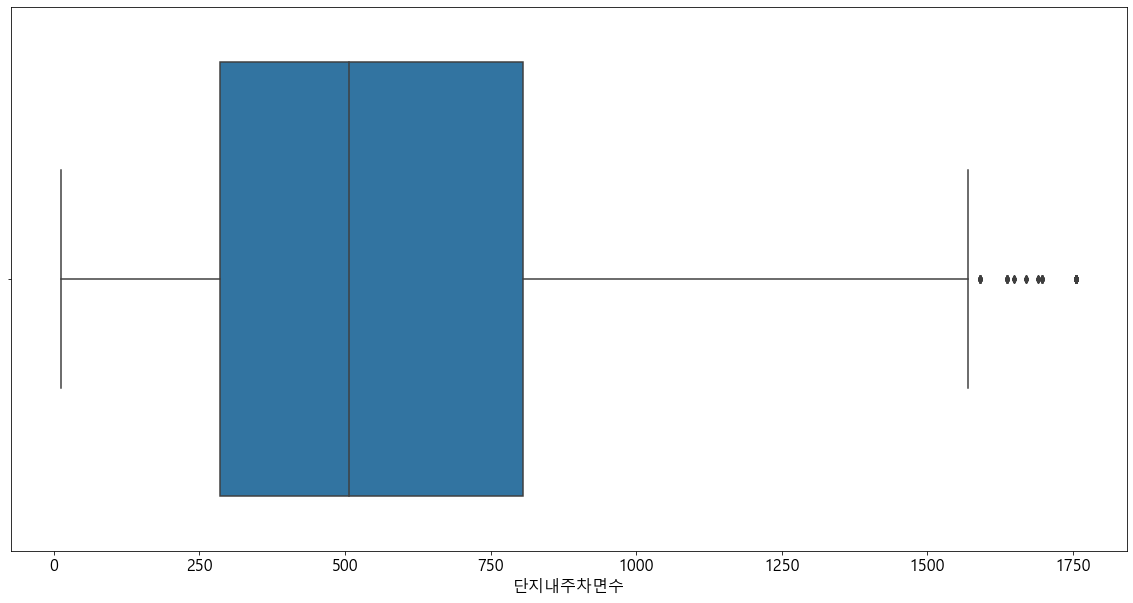

In [74]:
sns.boxplot(apps['단지내주차면수'])

## label_encoder

In [75]:
# from sklearn import preprocessing
# label_encoder=preprocessing.LabelEncoder()

In [76]:
# Label 인코딩을 위해 object 유형의 컬럼만 추출 
object_columns = apps.dtypes[apps.dtypes == 'object'].index.tolist()
object_columns

['단지코드', '임대건물구분', '지역', '공급유형', '신분']

In [77]:
object_columns.remove('단지코드')

In [78]:
object_columns

['임대건물구분', '지역', '공급유형', '신분']

In [79]:
# pd.factorize()는 한개의 컬럼만 Label 인코딩이 가능하므로 object형 컬럼들을 iteration하면서 변환 수행. 
for column in object_columns:
    apps[column] = pd.factorize(apps[column])[0]

In [80]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3900 entries, 0 to 1021
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   단지코드      3900 non-null   object 
 1   총세대수      3900 non-null   int64  
 2   임대건물구분    3900 non-null   int64  
 3   지역        3900 non-null   int64  
 4   공급유형      3900 non-null   int64  
 5   전용면적      3900 non-null   float64
 6   전용면적별세대수  3900 non-null   int64  
 7   공가수       3900 non-null   float64
 8   신분        3900 non-null   int64  
 9   임대보증금     3179 non-null   float64
 10  임대료       3170 non-null   float64
 11  지하철       3659 non-null   float64
 12  버스        3896 non-null   float64
 13  단지내주차면수   3900 non-null   float64
 14  등록차량수     2915 non-null   float64
dtypes: float64(8), int64(6), object(1)
memory usage: 552.0+ KB


- 총 53개

## Null값 추가처리 필요

## 등록차량수 Null값을 기준으로 train, test분리

In [81]:
# -999로 모든 컬럼들의 Null값 변환
apps['등록차량수'] = apps['등록차량수'].fillna(-999)

In [82]:
# app_test의 TARGET 컬럼은 원래 null이었는데 앞에서 fillna(-999)로 -999로 변환됨. 이를 추출함. 
app_train = apps[apps['등록차량수'] != -999]
app_test = apps[apps['등록차량수']== -999]
app_train.shape, app_test.shape

((2915, 15), (985, 15))

In [83]:
# app_test의 TARGET컬럼을 Drop
app_test = app_test.drop('등록차량수', axis=1)

In [84]:
app_train.shape, app_test.shape

((2915, 15), (985, 14))

### 상관관계

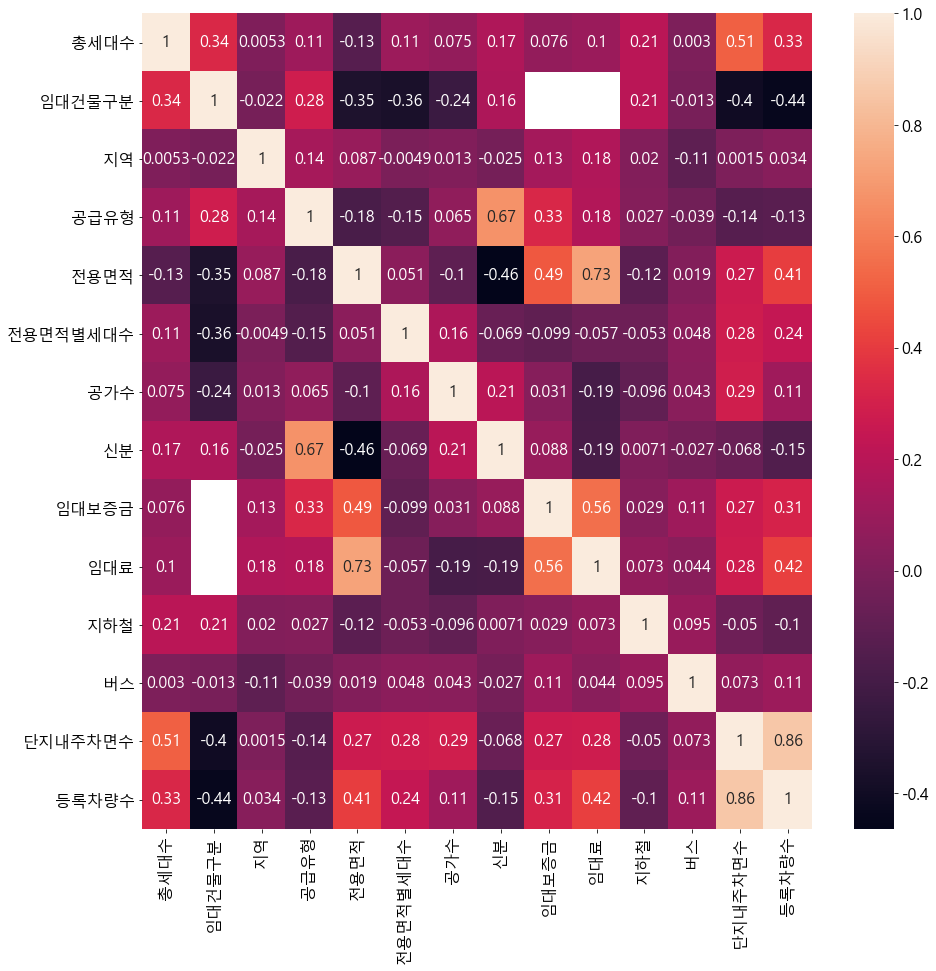

In [85]:
corr_columns = ['총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수', '신분',
    '임대보증금', '임대료', '지하철', '버스',
    '단지내주차면수', '등록차량수']


corr = app_train[corr_columns].corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True)
plt.savefig('전용면적100이상drop.png')

## 단지별 데이터 1차원으로 취합

In [86]:
columns = ['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수', '신분',
    '임대보증금', '임대료', '지하철', '버스','단지내주차면수']
target = '등록차량수'
area_columns = []
for area in app_train['전용면적'].unique():
    area_columns.append(f'면적_{area}')

In [87]:
new_train = pd.DataFrame()
new_test = pd.DataFrame()

In [88]:
for i, code in tqdm(enumerate(app_train['단지코드'].unique())):
    temp = app_train[app_train['단지코드']==code]
    temp.index = range(temp.shape[0])
    for col in columns:
        new_train.loc[i, col] = temp.loc[0, col]
    
    for col in area_columns:
        area = float(col.split('_')[-1])
        new_train.loc[i, col] = temp[temp['전용면적']==area]['전용면적별세대수'].sum()
    
    new_train.loc[i, '등록차량수'] = temp.loc[0, '등록차량수']
    
for i, code in tqdm(enumerate(app_test['단지코드'].unique())):
    temp = app_test[app_test['단지코드']==code]
    temp.index = range(temp.shape[0])
    for col in columns:
        new_test.loc[i, col] = temp.loc[0, col]
    
    for col in area_columns:
        area = float(col.split('_')[-1])
        new_test.loc[i, col] = temp[temp['전용면적']==area]['전용면적별세대수'].sum()

423it [00:05, 76.19it/s]
150it [00:01, 80.91it/s]


In [89]:
new_train

단지코드    총세대수  임대건물구분    지역  공급유형  전용면적  전용면적별세대수   공가수    신분  \
0    C2483   900.0     0.0   0.0   0.0  35.0     134.0  38.0   0.0   
1    C2515   545.0     0.0   1.0   0.0  30.0     276.0  17.0   0.0   
2    C1407  1216.0     0.0   2.0   0.0  30.0     288.0  13.0   0.0   
3    C1945   755.0     0.0   3.0   0.0  35.0     120.0   6.0   1.0   
4    C1470   696.0     0.0   4.0   0.0  35.0     228.0  14.0   0.0   
..     ...     ...     ...   ...   ...   ...       ...   ...   ...   
418  C2586    90.0     0.0   9.0   8.0  15.0      12.0   7.0   9.0   
419  C2035   492.0     0.0   5.0   0.0  25.0     132.0  24.0   0.0   
420  C2020    40.0     0.0   8.0   8.0  15.0      20.0   7.0  11.0   
421  C2437    90.0     0.0  11.0   2.0  20.0      90.0  12.0   2.0   
422  C2532   239.0     0.0   5.0   0.0  45.0      19.0   7.0   0.0   

          임대보증금  ...  면적_25.0  면적_70.0  면적_10.0  면적_15.0  면적_20.0  면적_60.0  \
0    15667000.0  ...      0.0      0.0      0.0      0.0      0.0      0.0   
1     9216000.0  ...      0.0      0.0      0.0      0.0      0.0      0.0   
2    15620000.0  ...      0.0      0.0      0.0      0.0      0.0      0.0   
3    15607000.0  ...      0.0      0.0      0.0      0.0      0.0      0.0   
4    12015000.0  ...      0.0      0.0      0.0      0.0      0.0      0.0   
..          ...  ...      ...      ...      ...      ...      ...      ...   
418  16800000.0  ...     42.0      0.0      0.0     12.0      0.0      0.0   
419  10000000.0  ...    156.0      0.0      0.0      0.0      0.0      0.0   
420  18000000.0  ...      5.0      0.0      0.0     20.0      0.0      0.0   
421  10346000.0  ...      0.0      0.0      0.0      0.0     90.0      0.0   
422  11346000.0  ...      0.0      0.0      0.0      0.0      0.0      0.0   

     면적_75.0  면적_80.0  면적_65.0   등록차량수  
0        0.0      0.0      0.0  1015.0  
1        0.0      0.0      0.0   205.0  
2        0.0      0.0      0.0  1064.0  
3        0.0      0.0      0.0   730.0  
4        0.0      0.0      0.0   553.0  
..       ...      ...      ...     ...  
418      0.0      0.0      0.0    57.0  
419      0.0      0.0      0.0   246.0  
420      0.0      0.0      0.0    19.0  
421      0.0      0.0      0.0    16.0  
422      0.0      0.0      0.0   146.0  

[423 rows x 30 columns]

In [90]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423 entries, 0 to 422
Data columns (total 30 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   단지코드      423 non-null    object 
 1   총세대수      423 non-null    float64
 2   임대건물구분    423 non-null    float64
 3   지역        423 non-null    float64
 4   공급유형      423 non-null    float64
 5   전용면적      423 non-null    float64
 6   전용면적별세대수  423 non-null    float64
 7   공가수       423 non-null    float64
 8   신분        423 non-null    float64
 9   임대보증금     419 non-null    float64
 10  임대료       417 non-null    float64
 11  지하철       403 non-null    float64
 12  버스        422 non-null    float64
 13  단지내주차면수   423 non-null    float64
 14  면적_35.0   423 non-null    float64
 15  면적_50.0   423 non-null    float64
 16  면적_55.0   423 non-null    float64
 17  면적_30.0   423 non-null    float64
 18  면적_45.0   423 non-null    float64
 19  면적_40.0   423 non-null    float64
 20  면적_25.0   423 non-null    float6

In [91]:
new_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 29 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   단지코드      150 non-null    object 
 1   총세대수      150 non-null    float64
 2   임대건물구분    150 non-null    float64
 3   지역        150 non-null    float64
 4   공급유형      150 non-null    float64
 5   전용면적      150 non-null    float64
 6   전용면적별세대수  150 non-null    float64
 7   공가수       150 non-null    float64
 8   신분        150 non-null    float64
 9   임대보증금     149 non-null    float64
 10  임대료       149 non-null    float64
 11  지하철       145 non-null    float64
 12  버스        150 non-null    float64
 13  단지내주차면수   150 non-null    float64
 14  면적_35.0   150 non-null    float64
 15  면적_50.0   150 non-null    float64
 16  면적_55.0   150 non-null    float64
 17  면적_30.0   150 non-null    float64
 18  면적_45.0   150 non-null    float64
 19  면적_40.0   150 non-null    float64
 20  면적_25.0   150 non-null    float6

## 결측치 처리

In [92]:
new_train = new_train.fillna(-1)
new_test = new_test.fillna(-1)

In [93]:
new_train

단지코드    총세대수  임대건물구분    지역  공급유형  전용면적  전용면적별세대수   공가수    신분  \
0    C2483   900.0     0.0   0.0   0.0  35.0     134.0  38.0   0.0   
1    C2515   545.0     0.0   1.0   0.0  30.0     276.0  17.0   0.0   
2    C1407  1216.0     0.0   2.0   0.0  30.0     288.0  13.0   0.0   
3    C1945   755.0     0.0   3.0   0.0  35.0     120.0   6.0   1.0   
4    C1470   696.0     0.0   4.0   0.0  35.0     228.0  14.0   0.0   
..     ...     ...     ...   ...   ...   ...       ...   ...   ...   
418  C2586    90.0     0.0   9.0   8.0  15.0      12.0   7.0   9.0   
419  C2035   492.0     0.0   5.0   0.0  25.0     132.0  24.0   0.0   
420  C2020    40.0     0.0   8.0   8.0  15.0      20.0   7.0  11.0   
421  C2437    90.0     0.0  11.0   2.0  20.0      90.0  12.0   2.0   
422  C2532   239.0     0.0   5.0   0.0  45.0      19.0   7.0   0.0   

          임대보증금  ...  면적_25.0  면적_70.0  면적_10.0  면적_15.0  면적_20.0  면적_60.0  \
0    15667000.0  ...      0.0      0.0      0.0      0.0      0.0      0.0   
1     9216000.0  ...      0.0      0.0      0.0      0.0      0.0      0.0   
2    15620000.0  ...      0.0      0.0      0.0      0.0      0.0      0.0   
3    15607000.0  ...      0.0      0.0      0.0      0.0      0.0      0.0   
4    12015000.0  ...      0.0      0.0      0.0      0.0      0.0      0.0   
..          ...  ...      ...      ...      ...      ...      ...      ...   
418  16800000.0  ...     42.0      0.0      0.0     12.0      0.0      0.0   
419  10000000.0  ...    156.0      0.0      0.0      0.0      0.0      0.0   
420  18000000.0  ...      5.0      0.0      0.0     20.0      0.0      0.0   
421  10346000.0  ...      0.0      0.0      0.0      0.0     90.0      0.0   
422  11346000.0  ...      0.0      0.0      0.0      0.0      0.0      0.0   

     면적_75.0  면적_80.0  면적_65.0   등록차량수  
0        0.0      0.0      0.0  1015.0  
1        0.0      0.0      0.0   205.0  
2        0.0      0.0      0.0  1064.0  
3        0.0      0.0      0.0   730.0  
4        0.0      0.0      0.0   553.0  
..       ...      ...      ...     ...  
418      0.0      0.0      0.0    57.0  
419      0.0      0.0      0.0   246.0  
420      0.0      0.0      0.0    19.0  
421      0.0      0.0      0.0    16.0  
422      0.0      0.0      0.0   146.0  

[423 rows x 30 columns]

## 기본모델 사용

In [94]:
X = new_train.iloc[:, 1:-1]
y= new_train.iloc[:,-1]
x_test = new_test.iloc[:,1:]

In [95]:
# 표준화 작업
scaler1 = MinMaxScaler()
scaler1.fit(X)
X = scaler1.transform(X)
X

array([[0.34382376, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.20416994, 0.        , 0.06666667, ..., 0.        , 0.        ,
        0.        ],
       [0.46813533, 0.        , 0.13333333, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00550747, 0.        , 0.53333333, ..., 0.        , 0.        ,
        0.        ],
       [0.02517703, 0.        , 0.73333333, ..., 0.        , 0.        ,
        0.        ],
       [0.08379229, 0.        , 0.33333333, ..., 0.        , 0.        ,
        0.        ]])

In [96]:
# 데이터를 나눈다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# 이전에 만든 예제들이 X, y로 사용하고 있기 때문에 변수에 담아준다.
X = X_train
y = y_train

In [97]:
params = {
    # 이웃의 개수
    'n_neighbors' : list(range(1, 11))
}

model1 = KNeighborsRegressor()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf1 = GridSearchCV(model1, param_grid=params, scoring='r2', cv=kfold)
grid_clf1.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid_clf1.best_params_}')
print(f'최적의 모델 평균성능 : {grid_clf1.best_score_}')

최적의 하이퍼 파라미터 : {'n_neighbors': 5}
최적의 모델 평균성능 : 0.6481686327514057


In [98]:
# LogisticRegression 
# penalty : 규제의 종류(l1, l2, elasticnet, none)
# C : 규제의 강도 
params = {
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
}

model2 = LogisticRegression()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf2 = GridSearchCV(model2, param_grid=params, scoring='r2', cv=kfold)
grid_clf2.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid_clf2.best_params_}')
print(f'최적의 모델 평균 성능 : {grid_clf2.best_score_}')

최적의 하이퍼 파라미터 : {'C': 100, 'penalty': 'l2'}
최적의 모델 평균 성능 : 0.49971282920542653


In [99]:
# Ridge
# alpha : 값이 작을 수록 규제가 약해지고 값이 클수록 규제가 강해진다.
params = {
    'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
}

model3 = Ridge()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf3 = GridSearchCV(model3, param_grid=params, scoring='r2', cv=kfold)
grid_clf3.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid_clf3.best_params_}')
print(f'최적의 모델 평균성능 : {grid_clf3.best_score_}')

최적의 하이퍼 파라미터 : {'alpha': 1}
최적의 모델 평균성능 : 0.7633075825686878


In [100]:
# Lasso
# alpha : 값이 작을 수록 규제가 약해지고 값이 클수록 규제가 강해진다.
params = {
    'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
}

model4 = Lasso()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf4 = GridSearchCV(model4, param_grid=params, scoring='r2', cv=kfold)
grid_clf4.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid_clf4.best_params_}')
print(f'최적의 모델 평균성능 : {grid_clf4.best_score_}')

최적의 하이퍼 파라미터 : {'alpha': 1}
최적의 모델 평균성능 : 0.762204170776652


In [101]:
# ElasticNet
# alpha : 값이 작을 수록 규제가 약해지고 값이 클수록 규제가 강해진다.
params = {
    'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
}

model5 = ElasticNet()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf5 = GridSearchCV(model5, param_grid=params, scoring='r2', cv=kfold)
grid_clf5.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid_clf5.best_params_}')
print(f'최적의 모델 평균성능 : {grid_clf5.best_score_}')

최적의 하이퍼 파라미터 : {'alpha': 0.01}
최적의 모델 평균성능 : 0.7622694050130813


In [102]:
# SVM(SVR)
# C : 규제의 강도 
params = {
    'C' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
}

model6 = SVR()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf6 = GridSearchCV(model6, param_grid=params, scoring='r2', cv=kfold)
grid_clf6.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid_clf6.best_params_}')
print(f'최적의 모델 평균성능 : {grid_clf6.best_score_}')

최적의 하이퍼 파라미터 : {'C': 1000}
최적의 모델 평균성능 : 0.7292605249404752


In [103]:
# max_depth : 최대 질문 생성 깊이
params = {
    'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

model7 = DecisionTreeRegressor()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf7 = GridSearchCV(model7, param_grid=params, scoring='r2', cv=kfold)
grid_clf7.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid_clf7.best_params_}')
print(f'최적의 모델 평균성능 : {grid_clf7.best_score_}')

최적의 하이퍼 파라미터 : {'max_depth': 3}
최적의 모델 평균성능 : 0.6025586390318187


In [104]:
# n_estimators : 트리의 개수
# max_depth : 최대 질문 생성 깊이
params = {
    'n_estimators' : [50, 100, 150, 200, 250, 300],
    'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

model8 = RandomForestRegressor()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf8 = GridSearchCV(model8, param_grid=params, scoring='r2', cv=kfold)
grid_clf8.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid_clf8.best_params_}')
print(f'최적의 모델 평균성능 : {grid_clf8.best_score_}')

최적의 하이퍼 파라미터 : {'max_depth': None, 'n_estimators': 250}
최적의 모델 평균성능 : 0.7330180854717874


In [105]:
# learning_rage : 학습률
# n_estimators : 트리의 개수
params = {
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1],
    'n_estimators' : [50, 100, 150, 200, 250, 300],
}

model9 = AdaBoostRegressor()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf9 = GridSearchCV(model9, param_grid=params, scoring='r2', cv=kfold)
grid_clf9.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid_clf9.best_params_}')
print(f'최적의 모델 평균성능 : {grid_clf9.best_score_}')

최적의 하이퍼 파라미터 : {'learning_rate': 0.1, 'n_estimators': 100}
최적의 모델 평균성능 : 0.7230688382971213


In [106]:
# learning_rage : 학습률
# n_estimators : 트리의 개수
# max_depth : 최대 질문 생성 깊이
params = {
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1],
    'n_estimators' : [50, 100, 150, 200, 250, 300],
    'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

model10 = GradientBoostingRegressor()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf10 = GridSearchCV(model10, param_grid=params, scoring='r2', cv=kfold)
grid_clf10.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid_clf10.best_params_}')
print(f'최적의 모델 평균성능 : {grid_clf10.best_score_}')

최적의 하이퍼 파라미터 : {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 200}
최적의 모델 평균성능 : 0.7549963745459305


In [107]:
# learning_rage : 학습률
# n_estimators : 트리의 개수
# max_depth : 최대 질문 생성 깊이
params = {
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1],
    'n_estimators' : [50, 100, 150, 200, 250, 300],
    'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

model11 = LGBMRegressor()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf11 = GridSearchCV(model11, param_grid=params, scoring='r2', cv=kfold)
grid_clf11.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid_clf11.best_params_}')
print(f'최적의 모델 평균성능 : {grid_clf11.best_score_}')

최적의 하이퍼 파라미터 : {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 150}
최적의 모델 평균성능 : 0.7329151027317715


In [108]:
# booster : 사용할 알고리즘 종류
# learning_rage : 학습률
# n_estimators : 트리의 개수
# max_depth : 최대 질문 생성 깊이
params = {
    'booster' : ['gbtree', 'gblinear'],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1],
    'n_estimators' : [50, 100, 150, 200, 250, 300],
    'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

model12 = XGBRegressor(silent=True, verbosity=0)
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf12 = GridSearchCV(model12, param_grid=params, scoring='r2', cv=kfold)
grid_clf12.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid_clf12.best_params_}')
print(f'최적의 모델 평균성능 : {grid_clf12.best_score_}')

최적의 하이퍼 파라미터 : {'booster': 'gbtree', 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 200}
최적의 모델 평균성능 : 0.7636122105098594


In [109]:
# 시각화를 위한 데이터프레임을 생성한다.

score_list = [
    grid_clf1.best_score_, grid_clf2.best_score_, grid_clf3.best_score_,
    grid_clf4.best_score_, grid_clf5.best_score_, grid_clf6.best_score_,
    grid_clf7.best_score_, grid_clf8.best_score_, grid_clf9.best_score_,
    grid_clf10.best_score_,grid_clf11.best_score_, grid_clf12.best_score_,    
]

results_df = pd.DataFrame({
    'Model' : ['KNN', 'LogisticRegression', 'Ridge','Lasso','ElasticNet' , 'SVC',
               'DecisionTree', 'RandomForest', 'AdaBoost','GradientBoost','LGBM','XGBoost'],
    'Score' : score_list
})

# score 기준으로 정렬
results_df.sort_values(by='Score', ascending=False, inplace=True)
# 인덱스를 리셋한다.
results_df.reset_index(drop=True, inplace=True)
results_df

Model     Score
0              XGBoost  0.763612
1                Ridge  0.763308
2           ElasticNet  0.762269
3                Lasso  0.762204
4        GradientBoost  0.754996
5         RandomForest  0.733018
6                 LGBM  0.732915
7                  SVC  0.729261
8             AdaBoost  0.723069
9                  KNN  0.648169
10        DecisionTree  0.602559
11  LogisticRegression  0.499713

## voting

In [110]:
# # SVC 에서 확률을 확인할 수 있도록 설정한다.
# grid_clf3.best_estimator_.probability = True

# model_list = (
#     ('model1', grid_clf1.best_estimator_), 
#     ('model2', grid_clf2.best_estimator_),
#     ('model3', grid_clf3.best_estimator_),
#     ('model4', grid_clf4.best_estimator_),
#     ('model5', grid_clf5.best_estimator_),
#     ('model6', grid_clf6.best_estimator_),
#     ('model7', grid_clf7.best_estimator_),
#     ('model8', grid_clf8.best_estimator_),
#     ('model9', grid_clf9.best_estimator_),
#      ('model10', grid_clf10.best_estimator_),
#     ('model11', grid_clf11.best_estimator_),
#     ('model12', grid_clf12.best_estimator_)
# )

# model13 = VotingRegressor(estimators=model_list,voting='hard')
# model14 = VotingRegressor(estimators=model_list,voting='soft')

In [112]:
# 최적의 모델을 생성한다.
best_model1 = grid_clf1.best_estimator_
best_model2 = LinearRegression()
best_model3 = grid_clf3.best_estimator_
best_model4 = grid_clf4.best_estimator_
best_model5 = grid_clf5.best_estimator_
best_model6 = grid_clf6.best_estimator_
best_model7 = grid_clf7.best_estimator_
best_model8 = grid_clf8.best_estimator_
best_model9 = grid_clf9.best_estimator_
best_model10 = grid_clf10.best_estimator_
best_model11 = grid_clf11.best_estimator_
best_model12 = grid_clf12.best_estimator_

# 사용할 알고리즘들..
model_list = [
    ('model1', best_model1), ('model2', best_model2), ('model3', best_model3),
    ('model4', best_model4), ('model5', best_model5), ('model6', best_model6),
    ('model7', best_model7), ('model8', best_model8), ('model9', best_model9),
    ('model10', best_model10), ('model11', best_model11),
    ('model12', best_model12)
]

best_model13 = VotingRegressor(estimators=model_list)

In [113]:
# 교차 검증을 수행한다.
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

r1 = cross_val_score(best_model1, X, y, scoring='r2', cv=kfold)
r2 = cross_val_score(best_model2, X, y, scoring='r2', cv=kfold)
r3 = cross_val_score(best_model3, X, y, scoring='r2', cv=kfold)
r4 = cross_val_score(best_model4, X, y, scoring='r2', cv=kfold)
r5 = cross_val_score(best_model5, X, y, scoring='r2', cv=kfold)
r6 = cross_val_score(best_model6, X, y, scoring='r2', cv=kfold)
r7 = cross_val_score(best_model7, X, y, scoring='r2', cv=kfold)
r8 = cross_val_score(best_model8, X, y, scoring='r2', cv=kfold)
r9 = cross_val_score(best_model9, X, y, scoring='r2', cv=kfold)
r10 = cross_val_score(best_model10, X, y, scoring='r2', cv=kfold)
r11 = cross_val_score(best_model11, X, y, scoring='r2', cv=kfold)
r12 = cross_val_score(best_model12, X, y, scoring='r2', cv=kfold)
r13 = cross_val_score(best_model13, X, y, scoring='r2', cv=kfold)

In [114]:
# 사용할 알고리즘을 리스트에 담는다.
check_list = [
    best_model1, best_model2, best_model3, best_model4, best_model5, best_model6,
    best_model7, best_model8, best_model9, best_model10, best_model11, best_model12, best_model13
]
# 교차 검증 평균을 담을 리스트
score_list = []

In [116]:
# 시각화를 위한 데이터프레임을 생성한다.

score_list = [
    r1.mean(), r2.mean(), r3.mean(),
    r4.mean(), r5.mean(), r6.mean(),
   r7.mean(), r8.mean(), r9.mean(),
    r10.mean(), r11.mean(),r12.mean(),r13.mean()
]

results_df = pd.DataFrame({
    'Model' : ['KNN', 'LogisticRegression', 'Ridge', 'Lasso','ElasticNet','SVR', 'DecisionTree',
               'RandomForest', 'AdaBoost', 'GradientBoost', 'LGBMRegressor',
                'XGBoost','Voting'],
    'Score' : score_list
})

# score 기준으로 정렬
results_df.sort_values(by='Score', ascending=False, inplace=True)
# 인덱스를 리셋한다.
results_df.reset_index(drop=True, inplace=True)
results_df

Model     Score
0               Voting  0.771029
1              XGBoost  0.763612
2                Ridge  0.763308
3           ElasticNet  0.762269
4                Lasso  0.762204
5        GradientBoost  0.752408
6        LGBMRegressor  0.732915
7                  SVR  0.729261
8         RandomForest  0.726232
9             AdaBoost  0.714615
10  LogisticRegression  0.707587
11                 KNN  0.648169
12        DecisionTree  0.602559

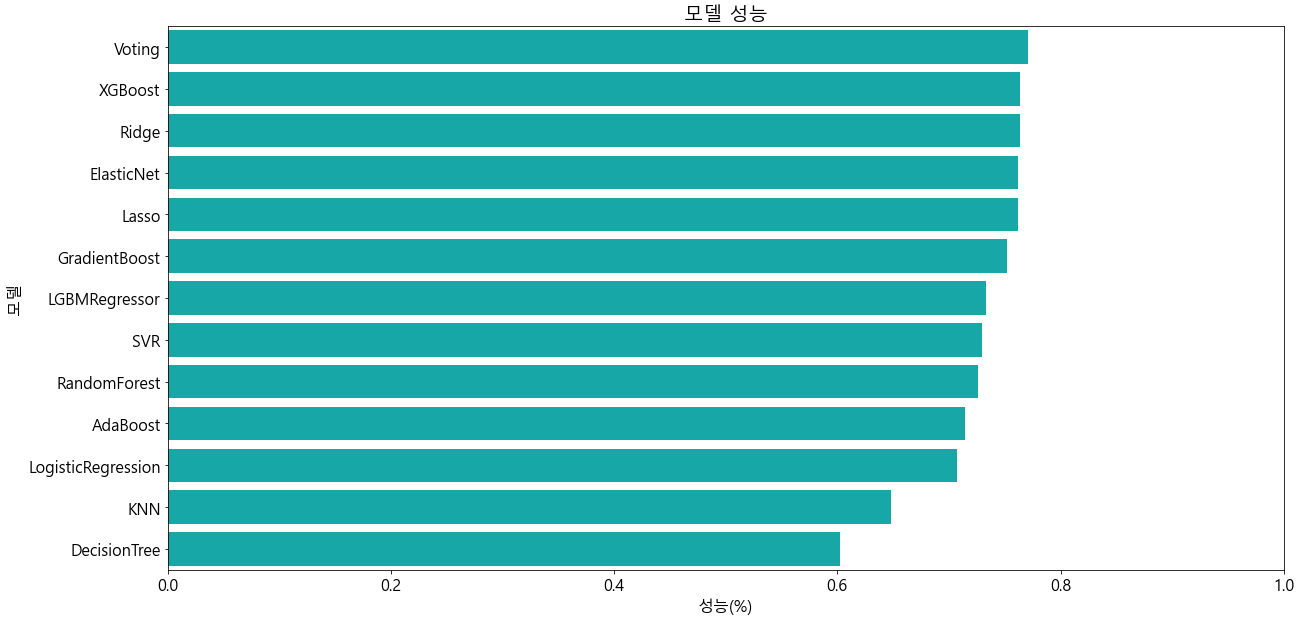

In [117]:
# 성능 평가 결과를 시각화한다.
sns.barplot(data=results_df, x='Score', y='Model', color='c')

plt.title('모델 성능')
plt.xlabel('성능(%)')
plt.ylabel('모델')
plt.xlim(0, 1)

plt.show()

In [118]:
# print(r1.mean())
# print(r2.mean())
# print(r3.mean())
# print(r4.mean())
# print(r5.mean())
# print(r6.mean())
# print(r7.mean())
# print(r8.mean())
# print(r9.mean())
# print(r10.mean())
# print(r11.mean())
# print(r12.mean())
# print(r13.mean())

### 학습 데이터를 이용해 평가를 실시한다.

In [119]:
# 전체 데이터를 학습시킨다.
best_model1.fit(X, y)
best_model2.fit(X, y)
best_model3.fit(X, y)
best_model4.fit(X, y)
best_model5.fit(X, y)
best_model6.fit(X, y)
best_model7.fit(X, y)
best_model8.fit(X, y)
best_model9.fit(X, y)
best_model10.fit(X, y)
best_model11.fit(X, y)
best_model12.fit(X, y)
best_model13.fit(X, y)

VotingRegressor(estimators=[('model1', KNeighborsRegressor()),
                            ('model2', LinearRegression()),
                            ('model3', Ridge(alpha=1)),
                            ('model4', Lasso(alpha=1)),
                            ('model5', ElasticNet(alpha=0.01)),
                            ('model6', SVR(C=1000)),
                            ('model7', DecisionTreeRegressor(max_depth=3)),
                            ('model8', RandomForestRegressor(n_estimators=250)),
                            ('model9',
                             AdaBoostRegressor(learning_rate=0.1,
                                               n_estim...
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=2, min_child_weight=1,
                           

In [120]:
# 학습 데이터를 통해 예측 결과를 가져온다.
y_pred1 = best_model1.predict(X)
y_pred2 = best_model2.predict(X)
y_pred3 = best_model3.predict(X)
y_pred4 = best_model4.predict(X)
y_pred5 = best_model5.predict(X)
y_pred6 = best_model6.predict(X)
y_pred7 = best_model7.predict(X)
y_pred8 = best_model8.predict(X)
y_pred9 = best_model9.predict(X)
y_pred10 = best_model10.predict(X)
y_pred11 = best_model11.predict(X)
y_pred12 = best_model12.predict(X)
y_pred13 = best_model13.predict(X)

In [121]:
# 그래프를 그리기 위해 y 값 인덱스를 다시 설정한다.
y.reset_index(drop=True, inplace=True)

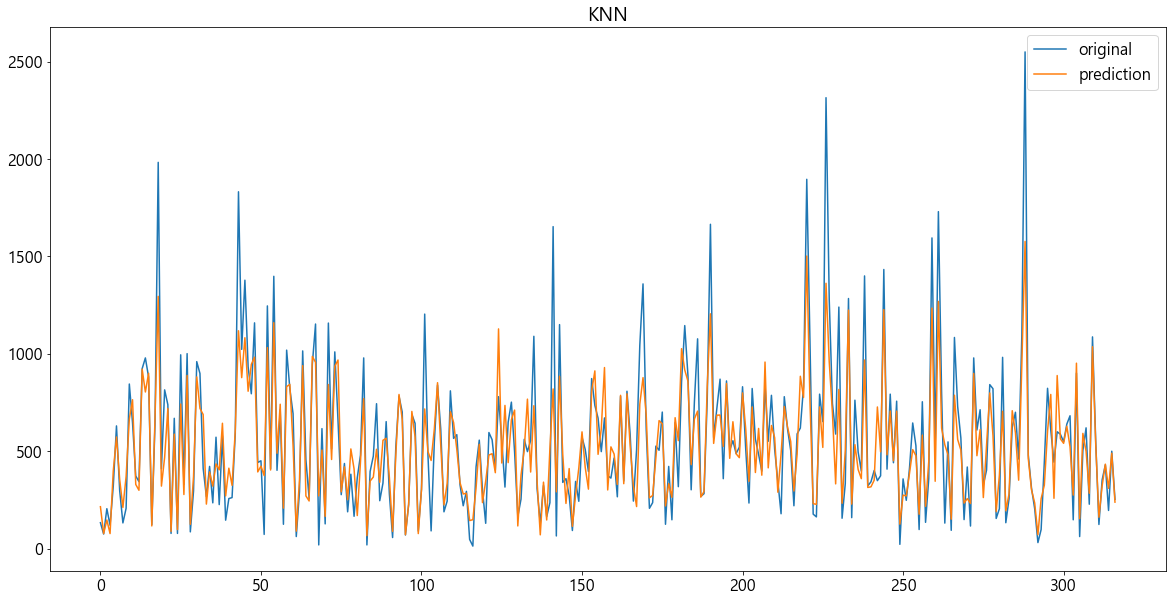

In [122]:
plt.plot(y, label='original')
plt.plot(y_pred1, label='prediction')
plt.legend()
plt.title('KNN')
plt.show()

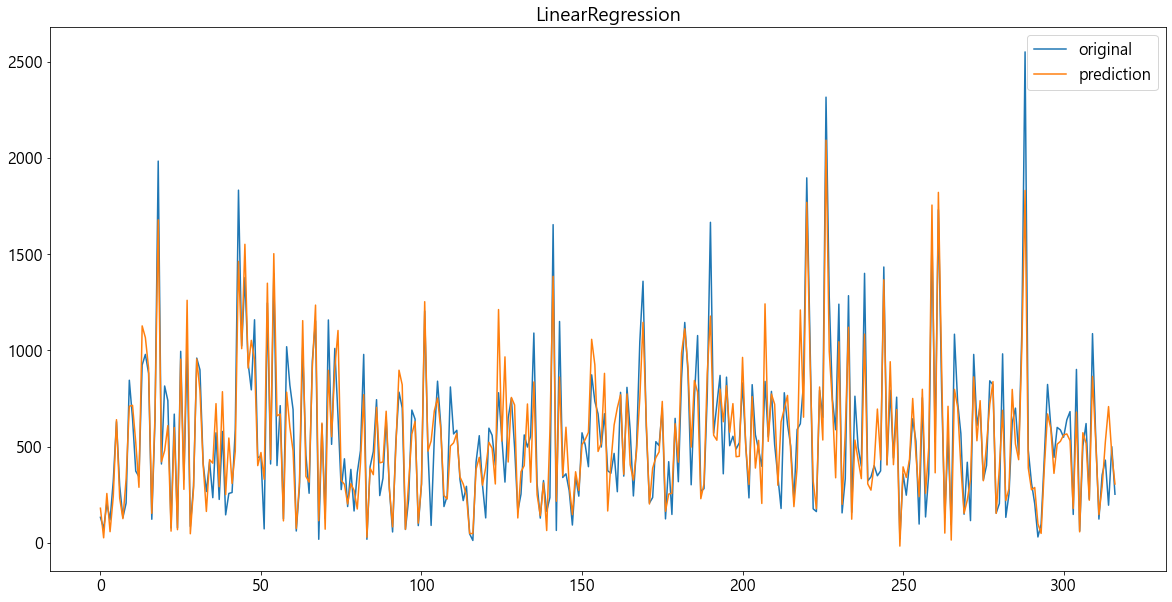

In [123]:
plt.plot(y, label='original')
plt.plot(y_pred2, label='prediction')
plt.legend()
plt.title('LinearRegression')
plt.show()

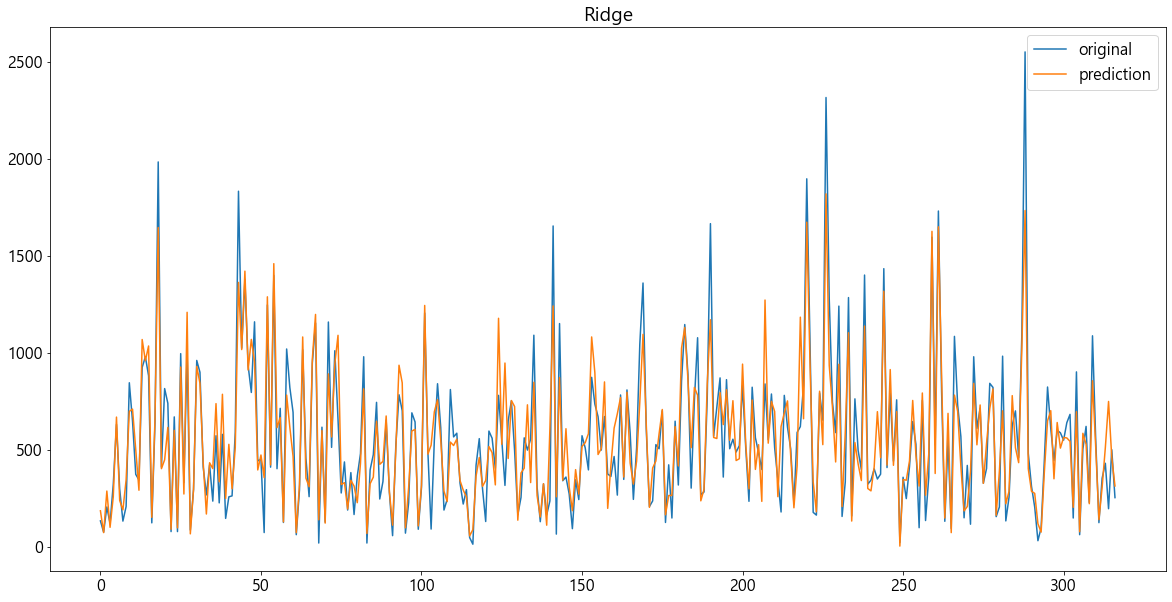

In [124]:
plt.plot(y, label='original')
plt.plot(y_pred3, label='prediction')
plt.legend()
plt.title('Ridge')
plt.show()

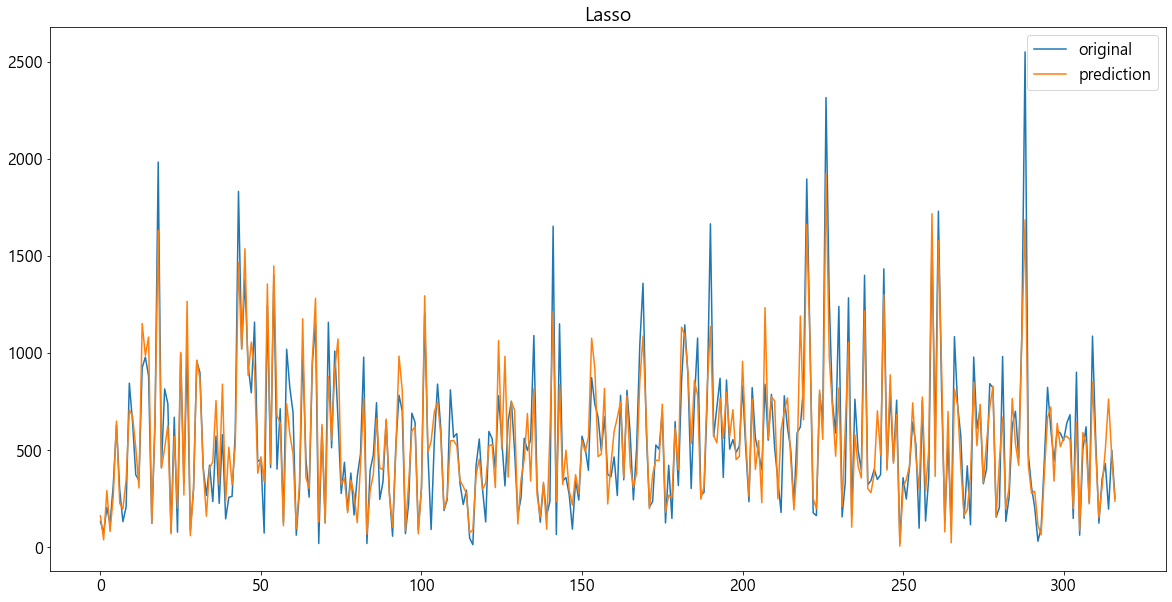

In [125]:
plt.plot(y, label='original')
plt.plot(y_pred4, label='prediction')
plt.legend()
plt.title('Lasso')
plt.show()

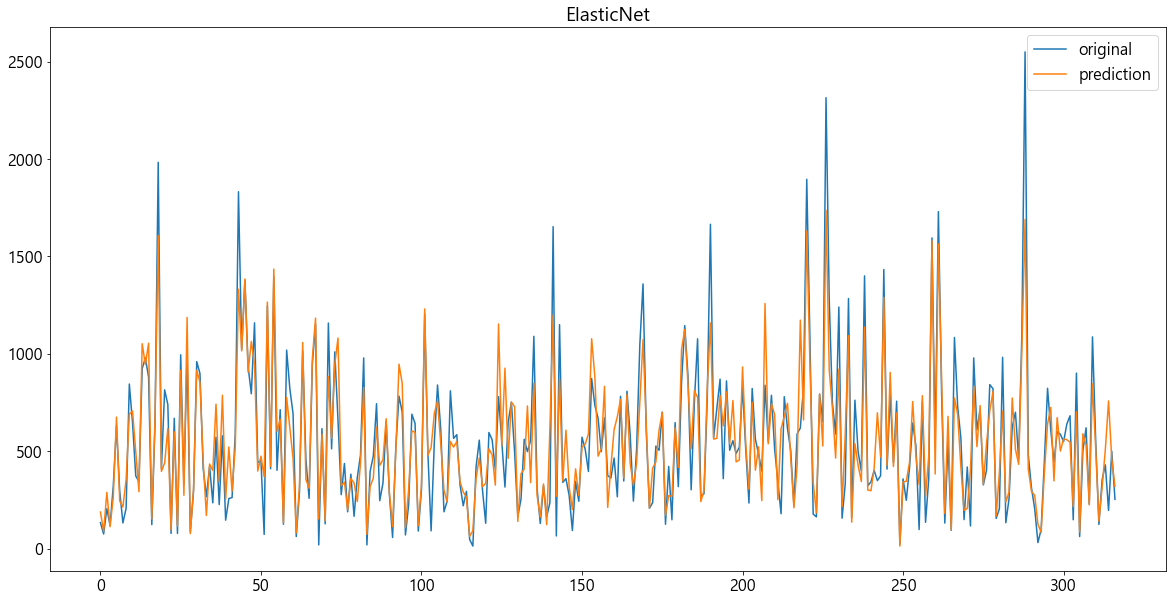

In [126]:
plt.plot(y, label='original')
plt.plot(y_pred5, label='prediction')
plt.legend()
plt.title('ElasticNet')
plt.show()

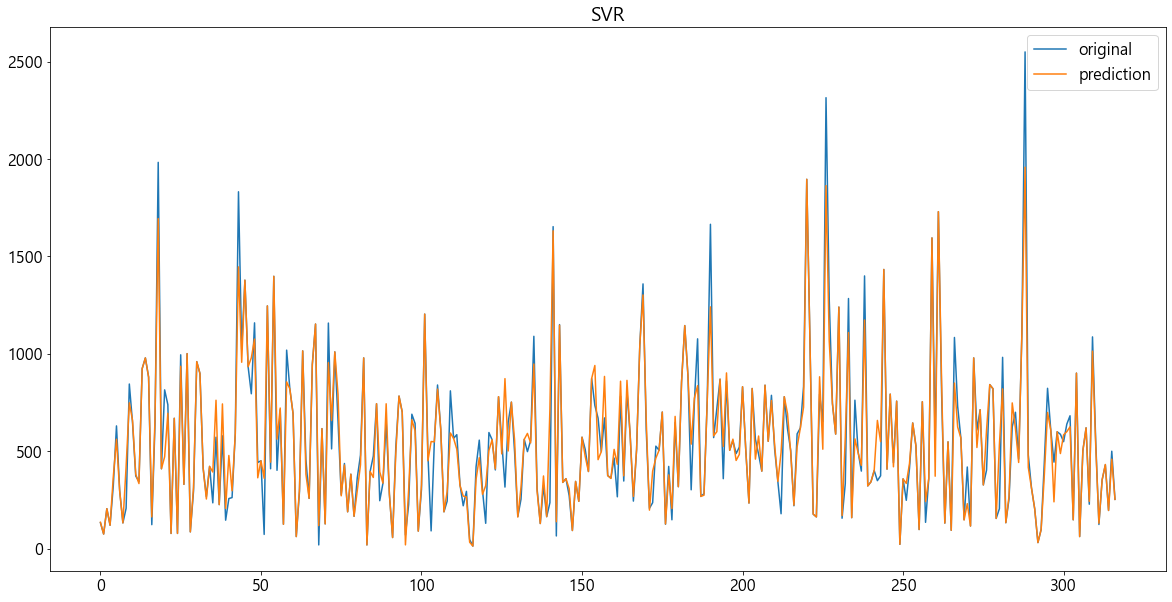

In [127]:
plt.plot(y, label='original')
plt.plot(y_pred6, label='prediction')
plt.legend()
plt.title('SVR')
plt.show()

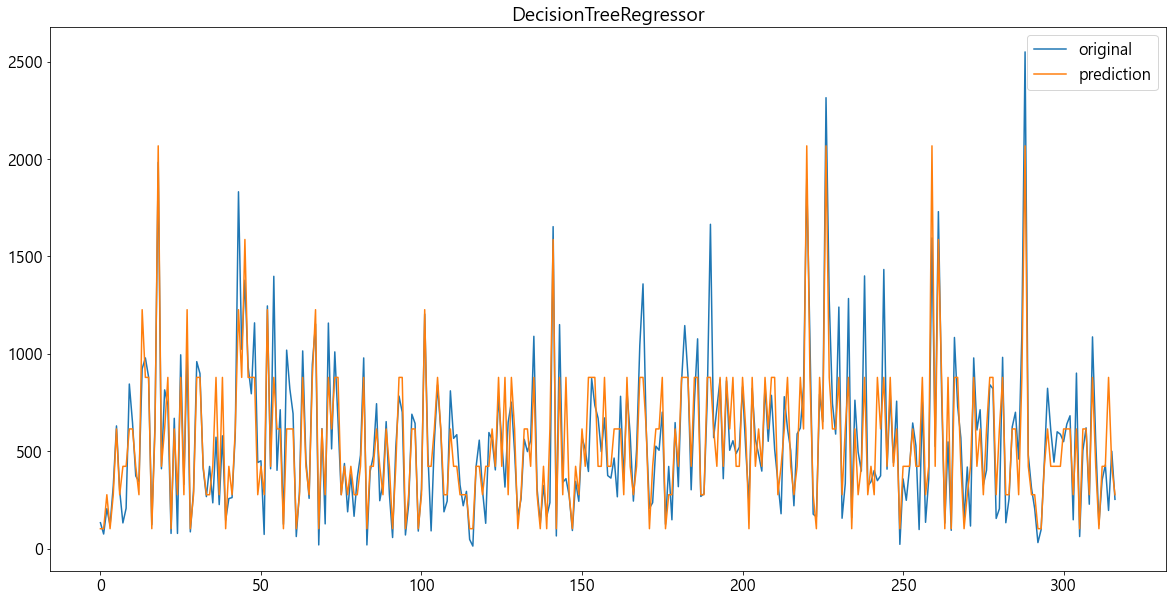

In [128]:
plt.plot(y, label='original')
plt.plot(y_pred7, label='prediction')
plt.legend()
plt.title('DecisionTreeRegressor')
plt.show()

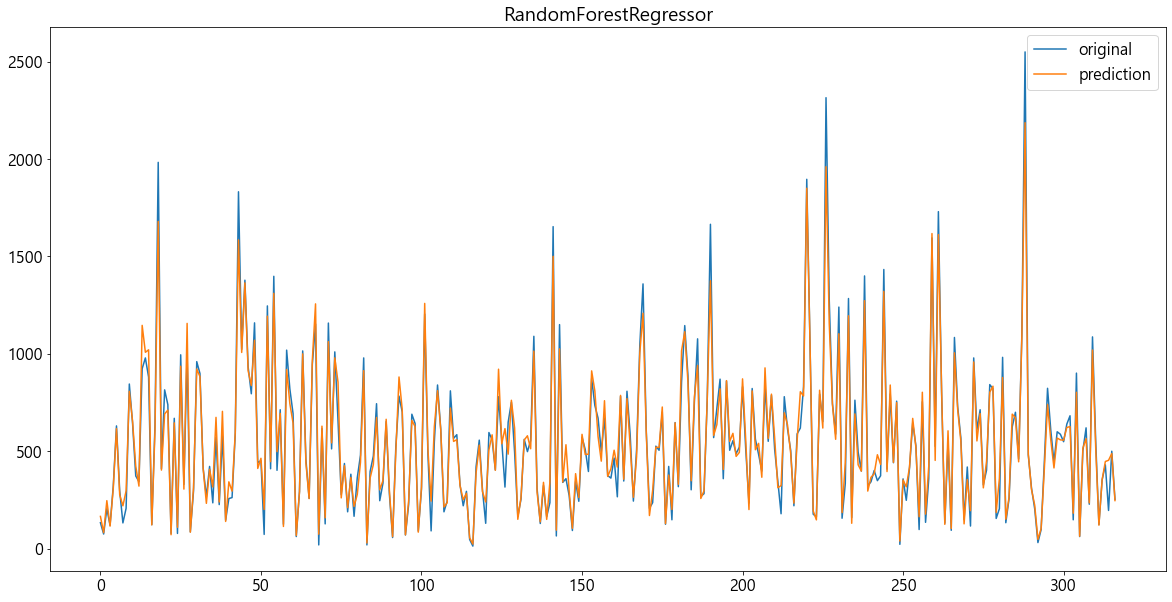

In [129]:
plt.plot(y, label='original')
plt.plot(y_pred8, label='prediction')
plt.legend()
plt.title('RandomForestRegressor')
plt.show()

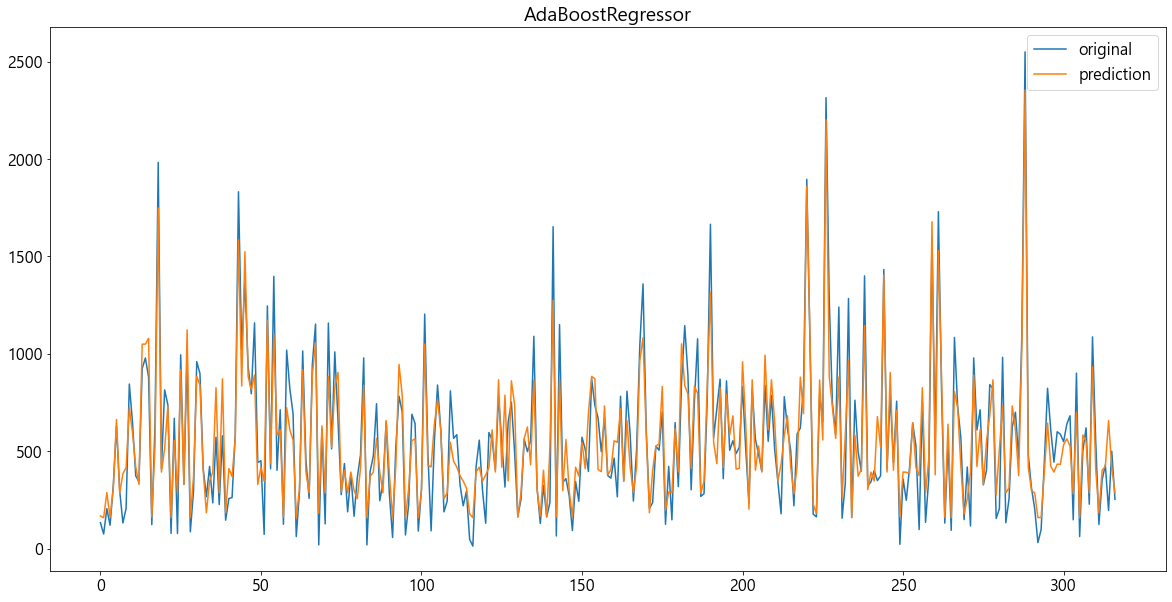

In [130]:
plt.plot(y, label='original')
plt.plot(y_pred9, label='prediction')
plt.legend()
plt.title('AdaBoostRegressor')
plt.show()

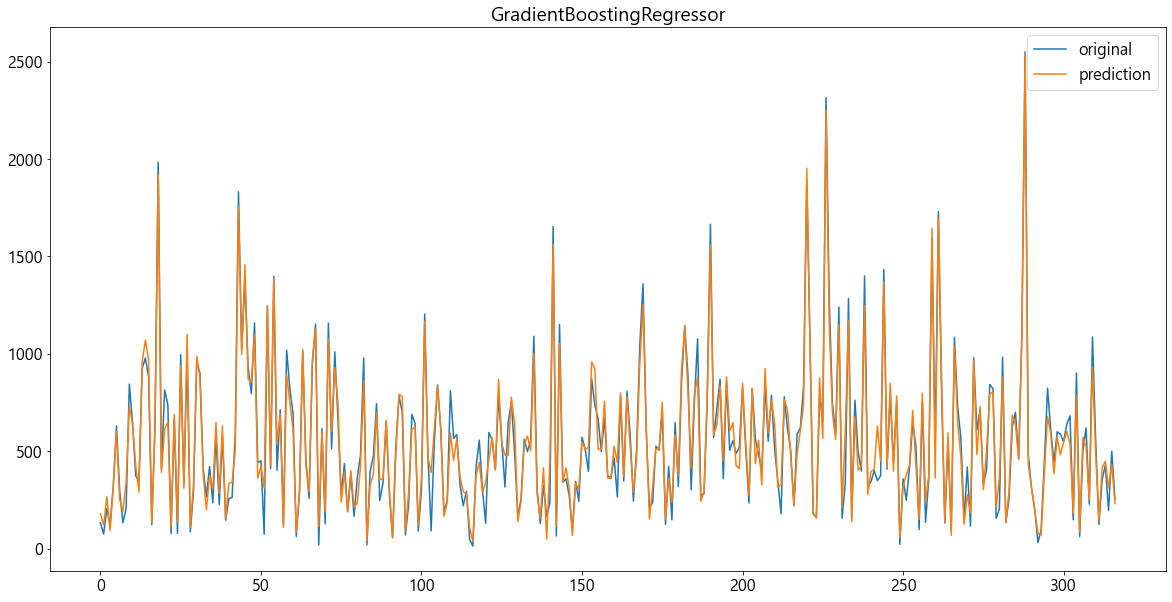

In [131]:
plt.plot(y, label='original')
plt.plot(y_pred10, label='prediction')
plt.legend()
plt.title('GradientBoostingRegressor')
plt.show()

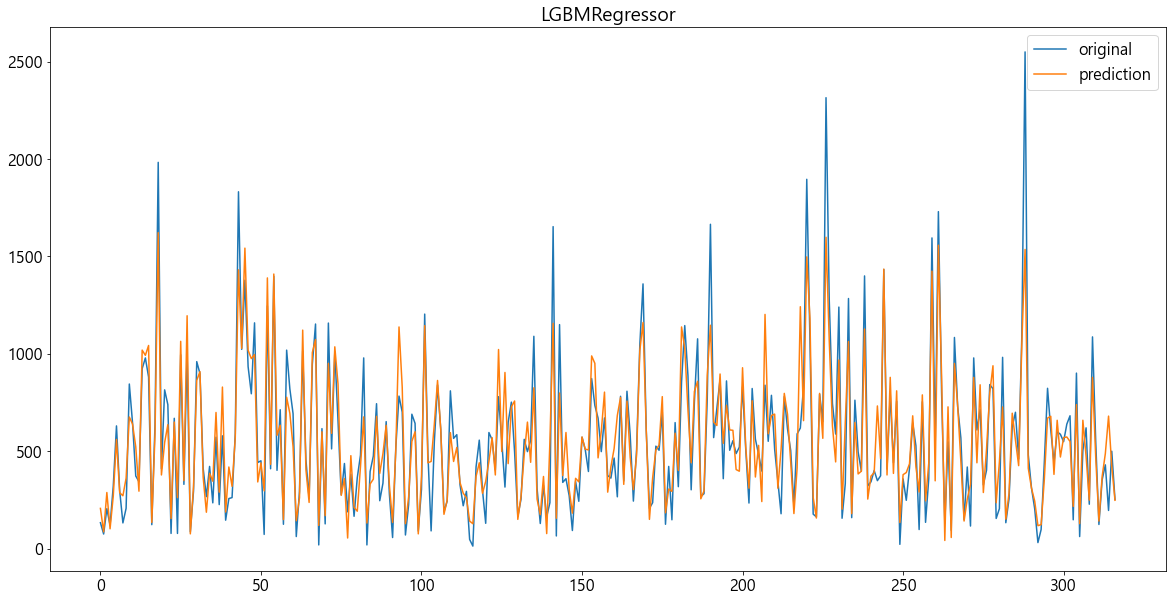

In [132]:
plt.plot(y, label='original')
plt.plot(y_pred11, label='prediction')
plt.legend()
plt.title('LGBMRegressor')
plt.show()

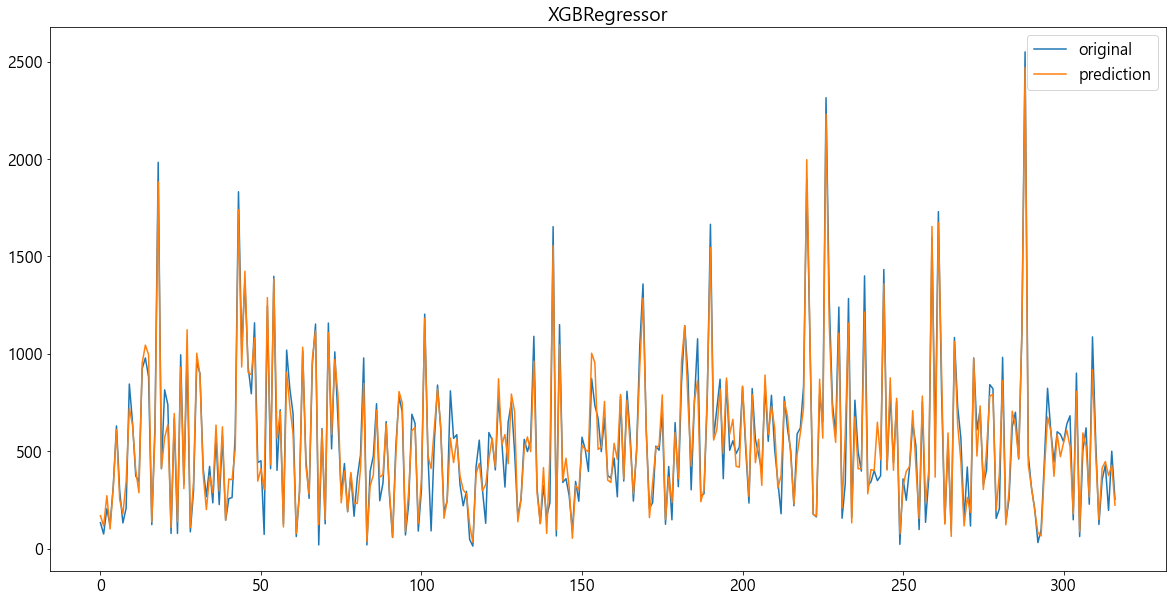

In [133]:
plt.plot(y, label='original')
plt.plot(y_pred12, label='prediction')
plt.legend()
plt.title('XGBRegressor')
plt.show()

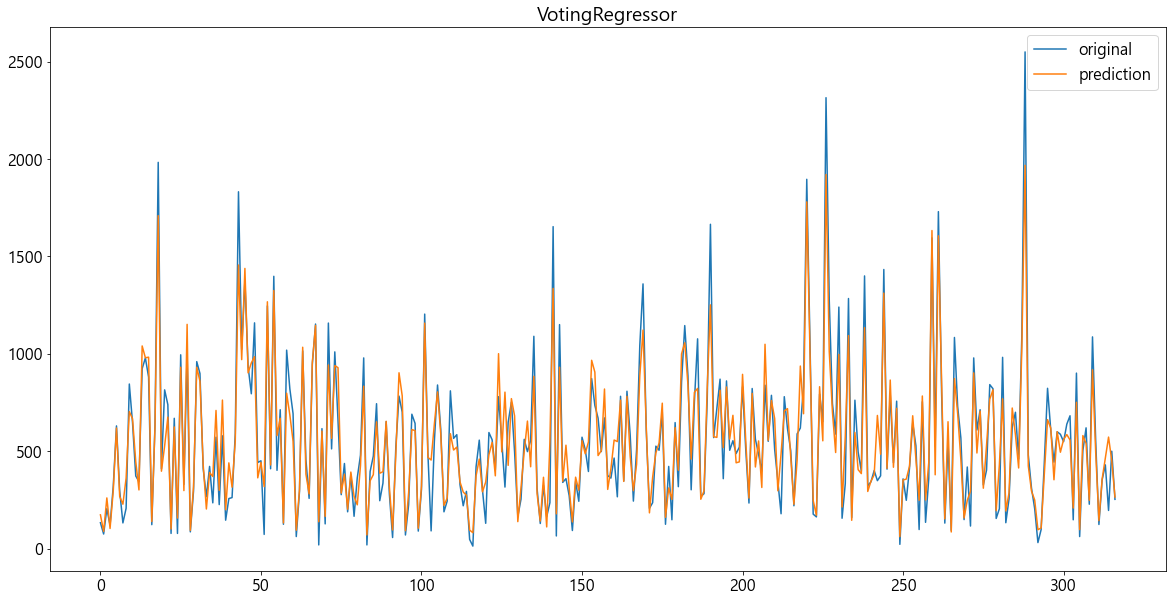

In [134]:
plt.plot(y, label='original')
plt.plot(y_pred13, label='prediction')
plt.legend()
plt.title('VotingRegressor')
plt.show()

In [135]:
best_model13

VotingRegressor(estimators=[('model1', KNeighborsRegressor()),
                            ('model2', LinearRegression()),
                            ('model3', Ridge(alpha=1)),
                            ('model4', Lasso(alpha=1)),
                            ('model5', ElasticNet(alpha=0.01)),
                            ('model6', SVR(C=1000)),
                            ('model7', DecisionTreeRegressor(max_depth=3)),
                            ('model8', RandomForestRegressor(n_estimators=250)),
                            ('model9',
                             AdaBoostRegressor(learning_rate=0.1,
                                               n_estim...
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=2, min_child_weight=1,
                           

### 최종평가
- 학습하지 않은 데이터를 통한 평가

In [136]:
# 표준화 작업
scaler1 = MinMaxScaler()
scaler1.fit(x_test)
x_test = scaler1.transform(x_test)
x_test

array([[0.27192631, 0.        , 0.2       , ..., 0.        , 0.        ,
        0.        ],
       [0.51221466, 0.        , 0.2       , ..., 0.        , 0.        ,
        0.        ],
       [0.21786143, 0.        , 0.53333333, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.01802163, 0.        , 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [0.24028835, 0.        , 0.06666667, ..., 0.        , 0.        ,
        0.        ],
       [0.12294754, 0.        , 0.26666667, ..., 0.        , 0.        ,
        0.        ]])

In [137]:
# 학습하지 않은 데이터를 통해 예측 결과를 가져온다.
y_pred1 = best_model1.predict(x_test)
y_pred2 = best_model2.predict(x_test)
y_pred3 = best_model3.predict(x_test)
y_pred4 = best_model4.predict(x_test)
y_pred5 = best_model5.predict(x_test)
y_pred6 = best_model6.predict(x_test)
y_pred7 = best_model7.predict(x_test)
y_pred8 = best_model8.predict(x_test)
y_pred9 = best_model9.predict(x_test)
y_pred10 = best_model10.predict(x_test)
y_pred11 = best_model11.predict(x_test)
y_pred12 = best_model12.predict(x_test)
y_pred13 = best_model13.predict(x_test)

In [138]:
# 그래프를 그리기 위해 y 값 인덱스를 다시 설정한다.
y_test.reset_index(drop=True, inplace=True)

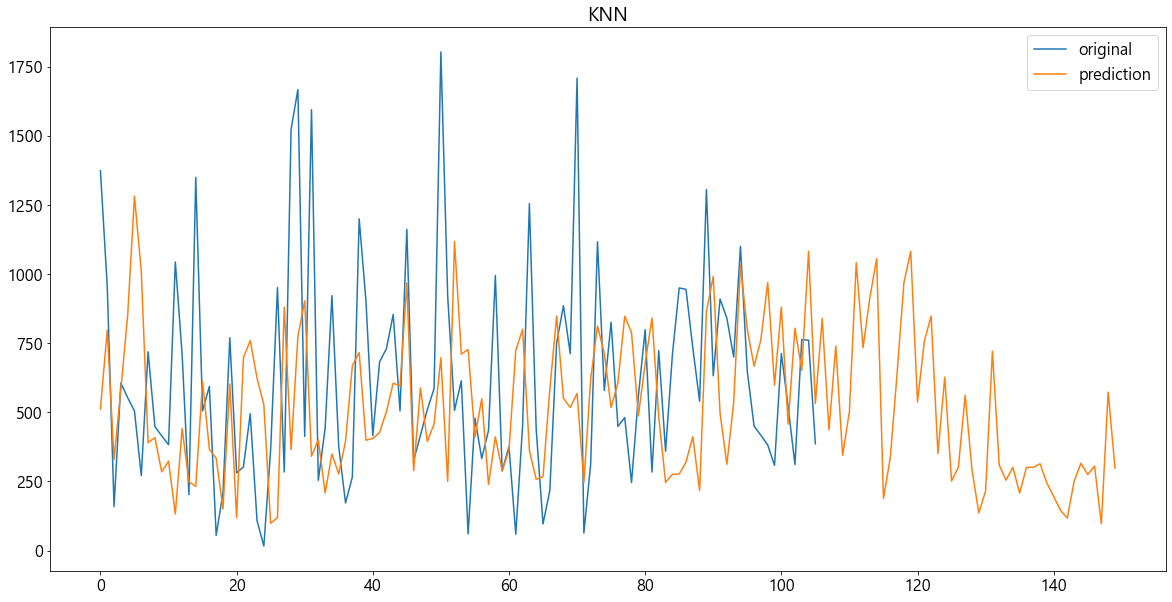

In [139]:
plt.plot(y_test, label='original')
plt.plot(y_pred1, label='prediction')
plt.legend()
plt.title('KNN')
plt.show()

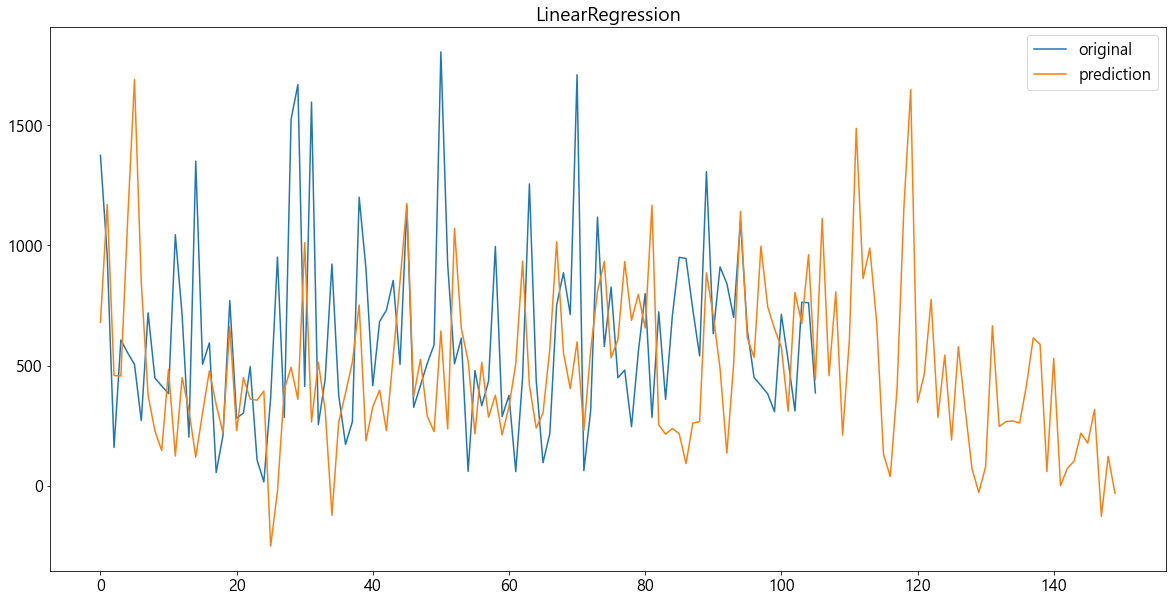

In [140]:
plt.plot(y_test, label='original')
plt.plot(y_pred2, label='prediction')
plt.legend()
plt.title('LinearRegression')
plt.show()

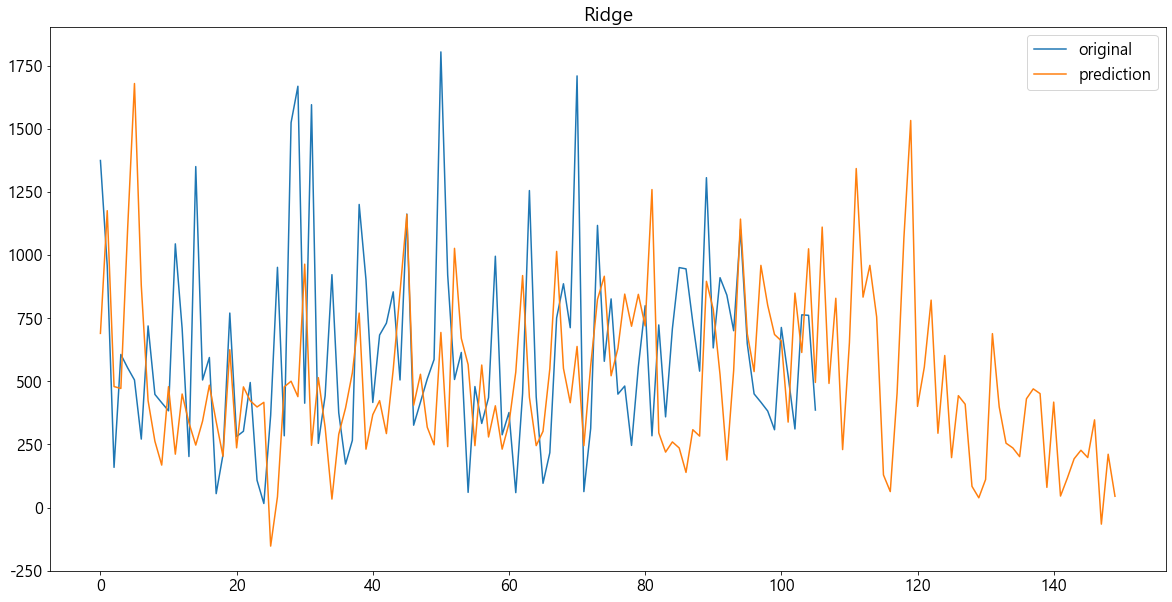

In [141]:
plt.plot(y_test, label='original')
plt.plot(y_pred3, label='prediction')
plt.legend()
plt.title('Ridge')
plt.show()

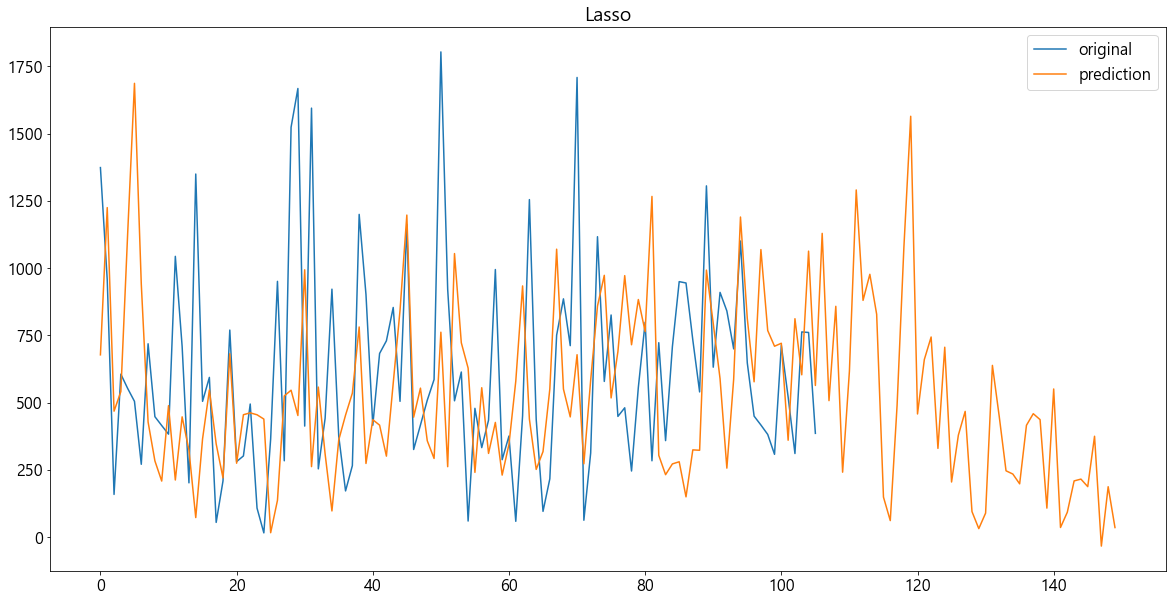

In [142]:
plt.plot(y_test, label='original')
plt.plot(y_pred4, label='prediction')
plt.legend()
plt.title('Lasso')
plt.show()

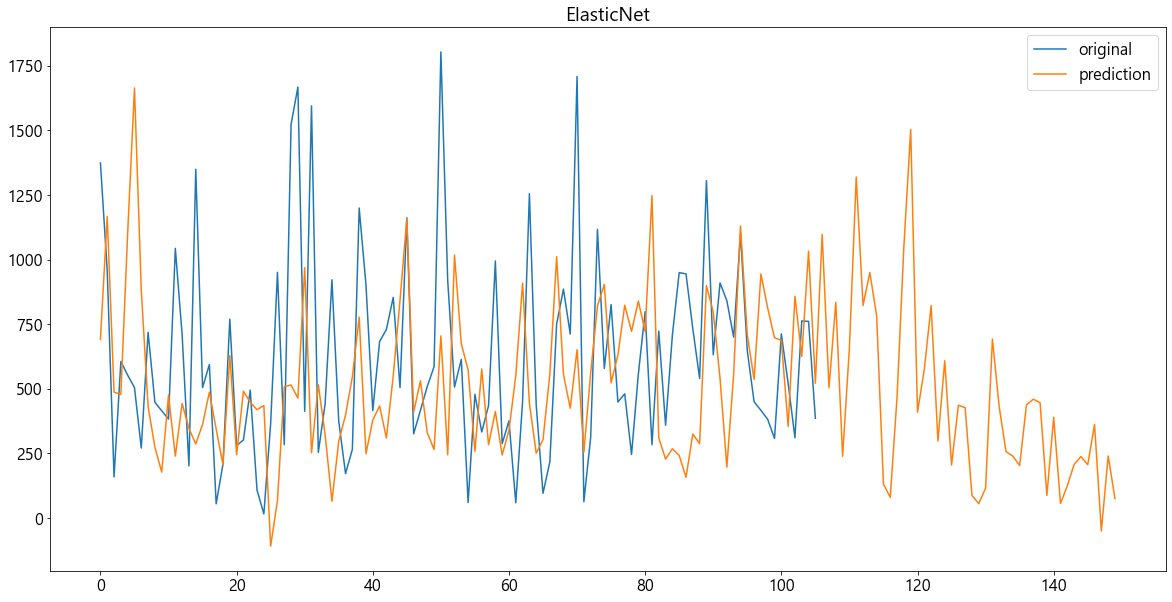

In [143]:
plt.plot(y_test, label='original')
plt.plot(y_pred5, label='prediction')
plt.legend()
plt.title('ElasticNet')
plt.show()

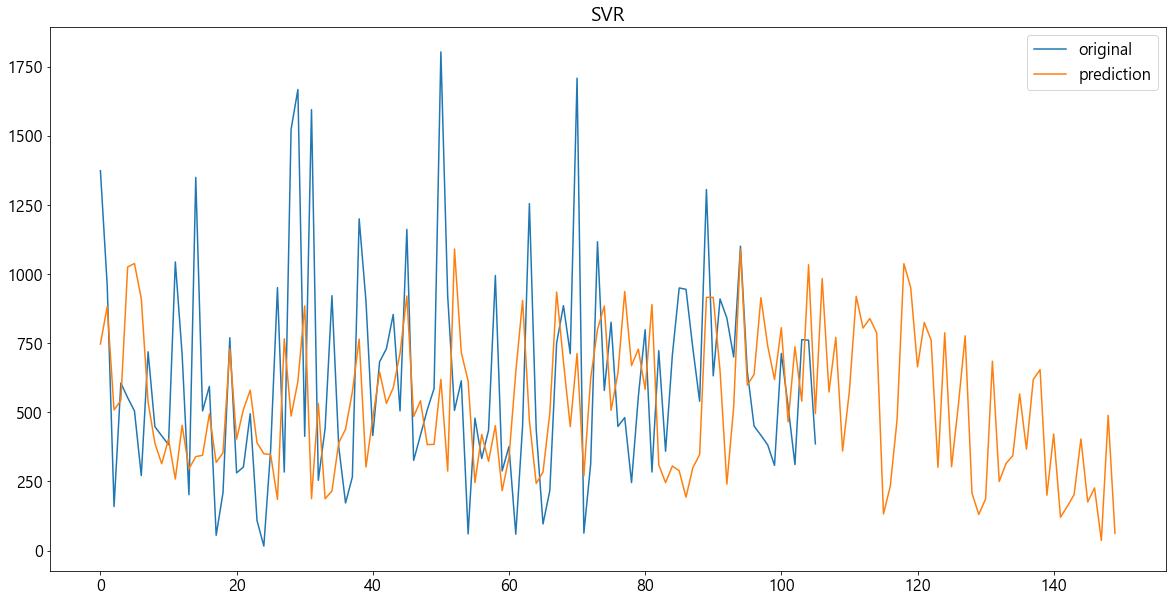

In [144]:
plt.plot(y_test, label='original')
plt.plot(y_pred6, label='prediction')
plt.legend()
plt.title('SVR')
plt.show()

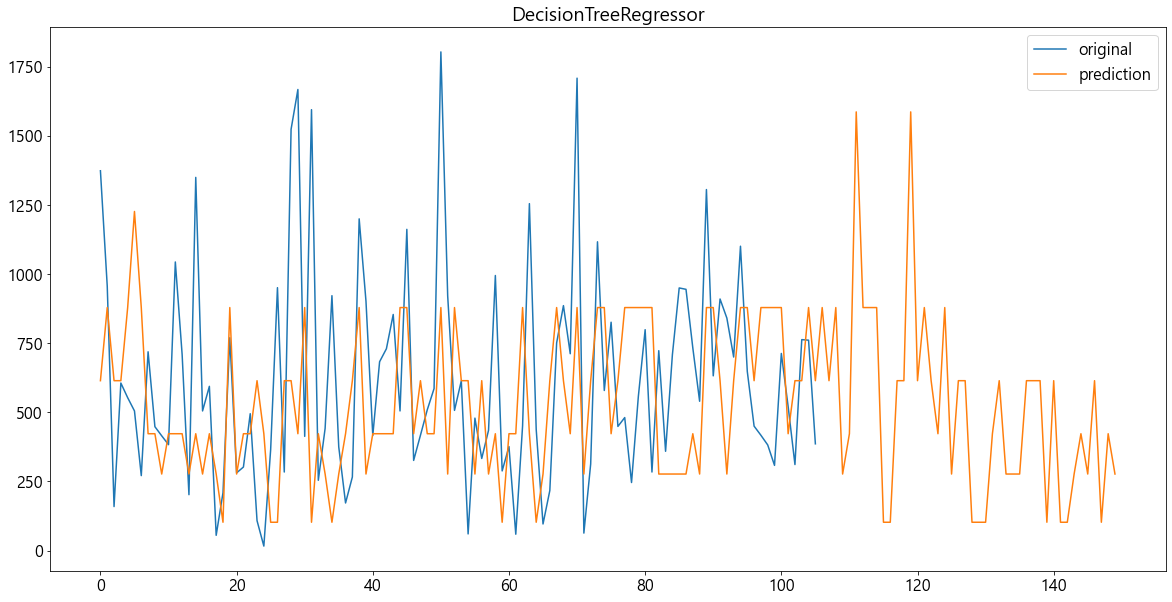

In [145]:
plt.plot(y_test, label='original')
plt.plot(y_pred7, label='prediction')
plt.legend()
plt.title('DecisionTreeRegressor')
plt.show()

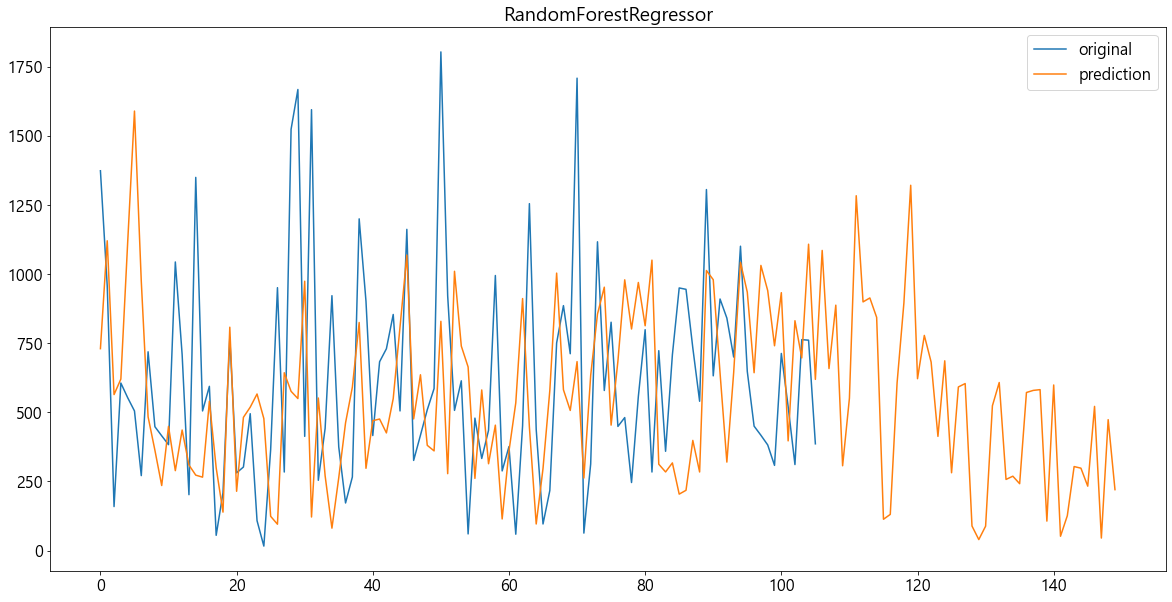

In [146]:
plt.plot(y_test, label='original')
plt.plot(y_pred8, label='prediction')
plt.legend()
plt.title('RandomForestRegressor')
plt.show()

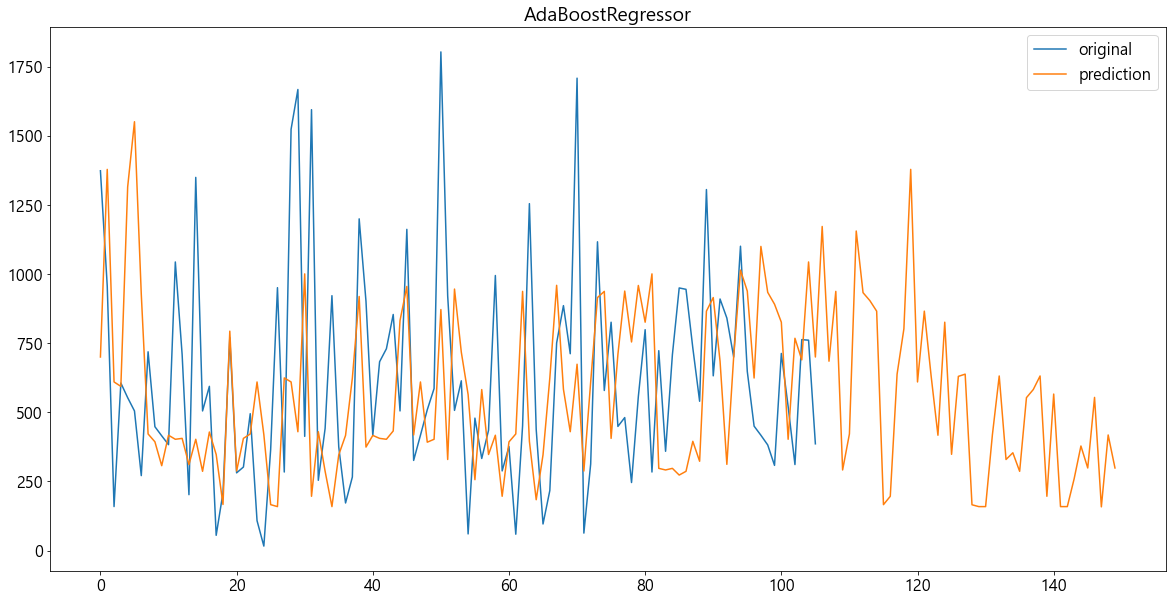

In [147]:
plt.plot(y_test, label='original')
plt.plot(y_pred9, label='prediction')
plt.legend()
plt.title('AdaBoostRegressor')
plt.show()

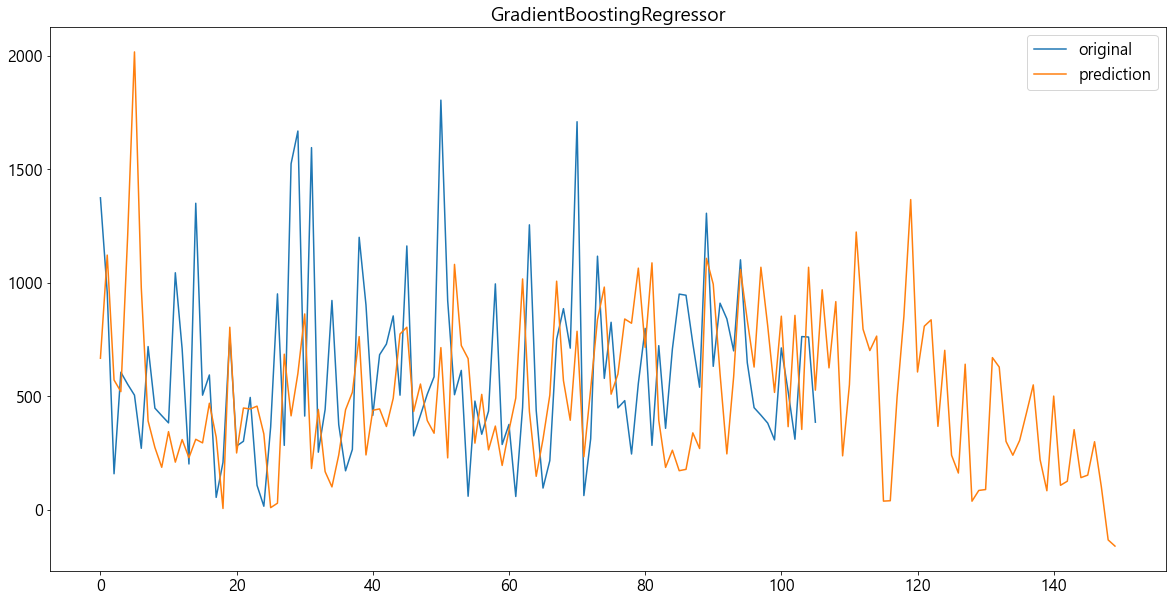

In [148]:
plt.plot(y_test, label='original')
plt.plot(y_pred10, label='prediction')
plt.legend()
plt.title('GradientBoostingRegressor')
plt.show()

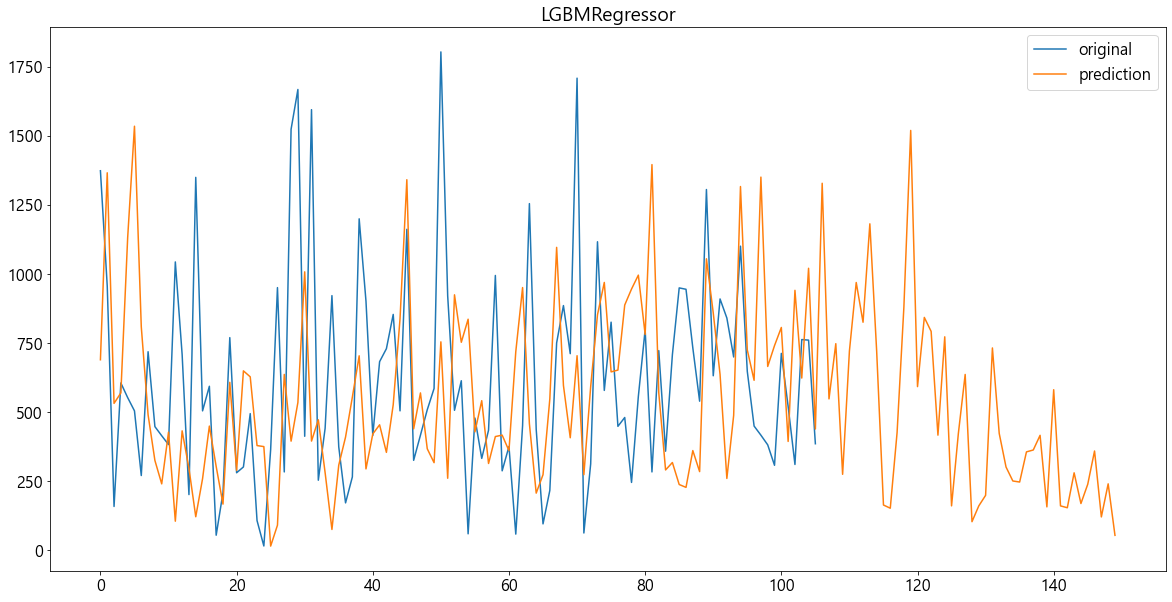

In [149]:
plt.plot(y_test, label='original')
plt.plot(y_pred11, label='prediction')
plt.legend()
plt.title('LGBMRegressor')
plt.show()

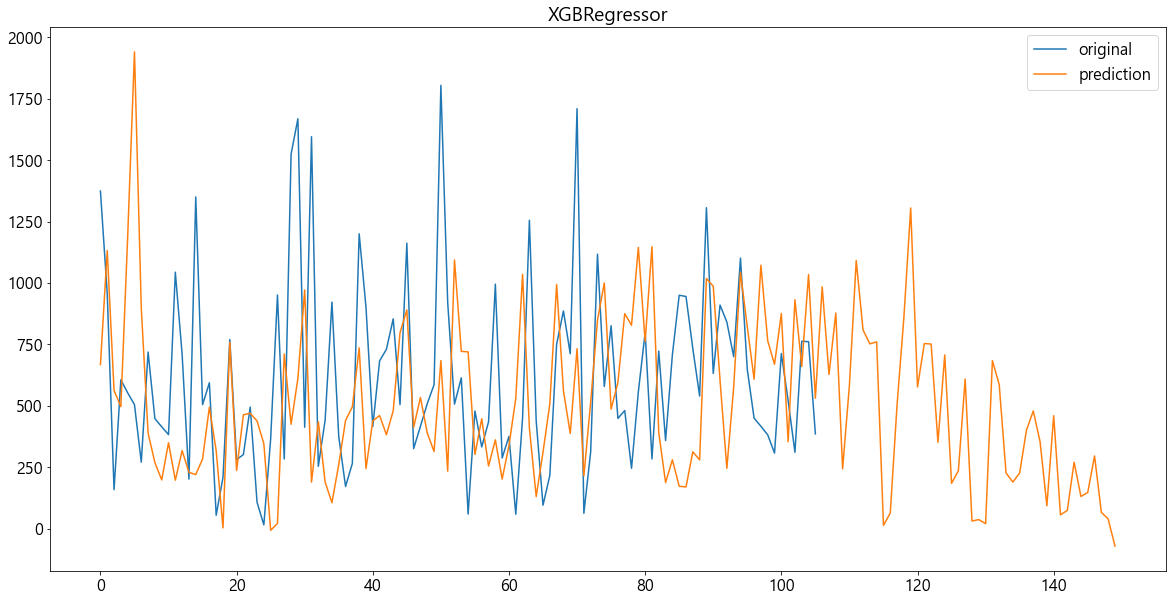

In [150]:
plt.plot(y_test, label='original')
plt.plot(y_pred12, label='prediction')
plt.legend()
plt.title('XGBRegressor')
plt.show()

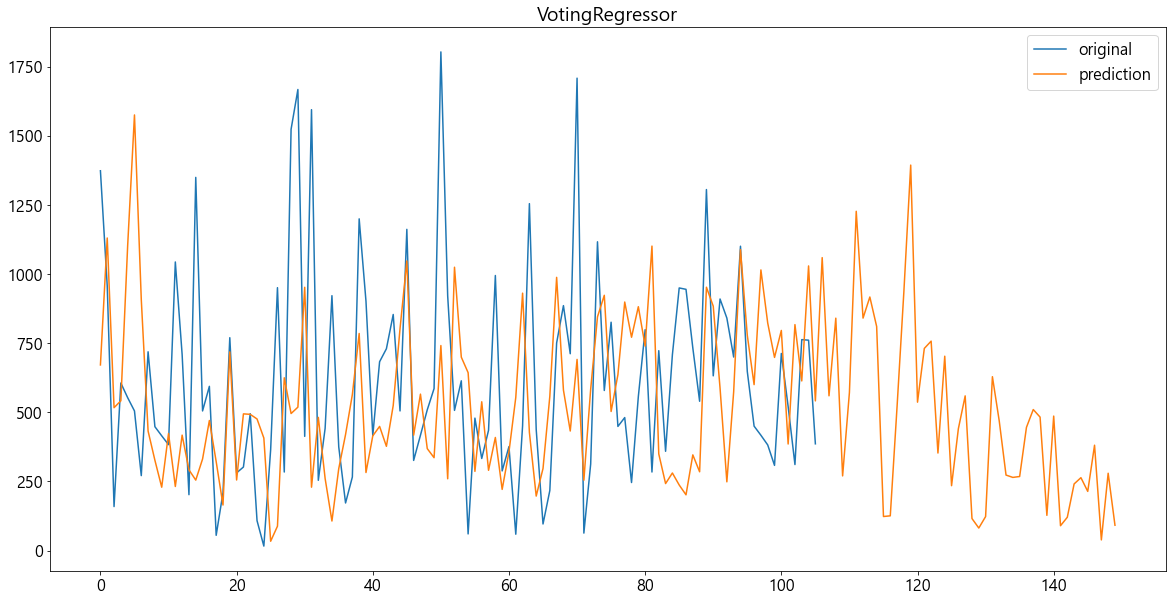

In [151]:
plt.plot(y_test, label='original')
plt.plot(y_pred13, label='prediction')
plt.legend()
plt.title('VotingRegressor')
plt.show()

In [152]:
# # 최적의 하이퍼파라미터가 셋팅된 모델을 받아온다.
# best_model = grid_clf.best_estimator_

# # 학습
# best_model.fit(X, y)



In [153]:
# model1.fit(x_train, y_train)### 모델 하이퍼 파라미터 튜닝

## 추론 및 제출

In [154]:
pred = best_model13.predict(x_test)

In [155]:
# x_test['예측'] = pred

In [156]:
submission['num'] = pred

In [157]:
submission['num']

0       671.450111
1      1130.692979
2       516.798085
3       541.748422
4      1103.184842
          ...     
145     213.918442
146     381.013196
147      38.373949
148     279.535119
149      91.427771
Name: num, Length: 150, dtype: float64

In [158]:
submission.to_csv('best_votingregressor(minmax).csv', index=False)